In [ ]:
!pip install pyarrow==11.0.0

In [ ]:
!pip install lightgbm

In [ ]:
!pip install openml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.4 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.2-py3-none-any.whl size=158699 sha256=56ead104e16bb36e0a29a5a84d4e620aad6c74b8751dfcd350fcefd6f81f9e04
  Stored in directory: /root/.cache/pip/wheels/2e/4e/af/5e721761d86375dbca82e63cc2470019e97815bc39f11451ea
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=48e39110a6523f3d61a203fd307de5d911c4a9b2563f30db61cc56aa40f49541
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.5 MB/s eta 0:00:00


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import sys
import numpy as np
from sklearn.feature_selection import SelectKBest, SelectFromModel, GenericUnivariateSelect
from sklearn.feature_selection import chi2, mutual_info_classif
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics, model_selection, svm, neighbors, preprocessing, datasets, pipeline, ensemble
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.covariance import empirical_covariance
from sklearn.preprocessing import normalize
from sklearn.feature_selection import mutual_info_regression
from sklearn.datasets import load_breast_cancer, fetch_openml
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import compose
import warnings
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.covariance import empirical_covariance
from sklearn. preprocessing import normalize
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold
import sklearn.feature_selection as fs
from sklearn.datasets import load_diabetes, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.covariance import empirical_covariance
from sklearn. preprocessing import normalize
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tqdm.notebook import tqdm
from sklearn.utils import resample
%pylab inline
import pandas as pd

from sklearn.datasets import load_diabetes, make_classification
from sklearn.model_selection import train_test_split
import time

import numpy as np
from sklearn.svm import SVC
from lightgbm import LGBMClassifier, LGBMRegressor
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.mixture import GaussianMixture
from itertools import combinations

Populating the interactive namespace from numpy and matplotlib


####Кодирование признаков

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.base import BaseEstimator, TransformerMixin
import sklearn.preprocessing as skpr
import category_encoders as ce
import numpy as np
import pandas as pd
import datetime
import copy
import math


class CircularEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, limits=None, fit_replace=True, tol=1e-8):
        self.limits = limits
        self.fit_replace = fit_replace
        self.tol = tol
        self._shape = (0, 0)

    def __repr__(self):
        return "Circular Encoder"

    def __str__(self):
        return "Circular Encoder"

    def fit(self, X, y=None):

        # Shape setting
        self._shape = self.__set_shape(X)

        # Defining limit
        if self.fit_replace:
            self.limits = self.__set_limits(X)

        return self

    def transform(self, X, y=None):
        if self.limits is None:
            return copy.deepcopy(X)

        # column_names only for DataFrame
        column_names = None

        # cast to numpy array
        if isinstance(X, pd.DataFrame):
            X_ndarray = X.to_numpy().reshape(self._shape)
            column_names = np.zeros(2 * X.columns.shape[0], dtype=object)
        else:
            X_ndarray = X.reshape(self._shape)

        # main encoding
        result_sin = np.sin((2 * np.pi * X_ndarray) / self.limits)
        result_cos = np.cos((2 * np.pi * X_ndarray) / self.limits)

        result_sin[np.abs(result_sin) < self.tol] = 0.0
        result_cos[np.abs(result_cos) < self.tol] = 0.0

        # combine encoded arrays
        result = np.zeros((self._shape[0], self._shape[1] * 2))
        result[:, np.arange(0, result.shape[1], 2)] = result_sin
        result[:, np.arange(1, result.shape[1], 2)] = result_cos

        # set column_names names and return result
        if column_names is not None:
            column_names[np.arange(0, result.shape[1], 2)] = np.array([f'sin_{col}' for col in X.columns])
            column_names[np.arange(1, result.shape[1], 2)] = np.array([f'cos_{col}' for col in X.columns])
            return pd.DataFrame(result, columns=column_names).infer_objects()
        else:
            return result

    @staticmethod
    def __set_shape(X):
        if len(X.shape) == 1:
            return (X.shape[0], 1)
        elif len(X.shape) > 2:
            raise ValueError(f"You need 2 dimensions instead of {len(X.shape)}")
        else:
            return X.shape

    @staticmethod
    def __set_limits(X):
        if isinstance(X, pd.DataFrame):
            return np.max(np.abs(X.to_numpy()), axis=0) + 1
        else:
            return np.max(np.abs(X), axis=0) + 1


class DateTimeEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None, fit_replace=False,
                 drop=True, min_rescale=False, fast_mode=True,
                 confidence_level=0.99, worst_proportion=0.01):
        self.cols = np.array(cols) if cols is not None else None
        self.fit_replace = fit_replace
        self.drop = drop
        self.min_rescale = min_rescale

        # stochastic approach
        eps = 1e-6
        confidence_level = max(eps, min(confidence_level, 1 - eps))
        worst_proportion = max(eps, min(worst_proportion, 1 - eps))
        self.fast_random_size = math.ceil(math.log(1 - confidence_level) / math.log(1 - worst_proportion))
        self.fast_mode = fast_mode

        # encoders for months, days and hours
        self.encoders = {'months': CircularEncoder(limits=[12], fit_replace=False),
                         'days': CircularEncoder(limits=[30], fit_replace=False),
                         'hours': CircularEncoder(limits=[24], fit_replace=False)}

    def __repr__(self):
        return "DateTimeEncoder"

    def __str__(self):
        return "DateTimeEncoder"

    def fit(self, X, y=None):
        if self.cols is None or self.fit_replace:
            if self.fast_mode and self.fast_random_size < X.shape[0]:
                self.cols = self.define_cols_fast(X)
            else:
                self.cols = self.define_cols(X)

        return self

    def transform(self, X, y=None):
        try:
            if self.cols is None or not self.cols.shape[0]:
                return copy.deepcopy(X)
        except IndexError:
            raise IndexError("cols should be a numpy array")

        # save self.cols and get indices for X
        saved_cols = self.cols.copy()
        self.cols = self.cols_to_numeric(X)

        if not self.cols.shape[0]:
            self.cols = saved_cols
            return copy.deepcopy(X)

        column_names = None

        # cast to pandas DataFrame
        if isinstance(X, pd.DataFrame):
            column_names = X.columns.to_numpy(dtype=object).copy()
            X_df = X
        else:
            X_df = pd.DataFrame(X)

        # shift for dropping columns
        shift = 0 if self.drop else 1

        # creating an empty result matrix
        result = np.zeros((X_df.shape[0], X_df.shape[1] + (6 + shift) * len(self.cols)), dtype=object)
        column_names_zeros = np.zeros(X_df.shape[1] + (6 + shift) * len(self.cols), dtype=object)

        # creating indices for fast numpy operation
        modified_inds = np.array([self.cols[i] + i * (6 + shift) for i in range(len(self.cols))])
        not_cols = list(set(np.arange(X.shape[1])) - set(self.cols))
        unmodified_inds = np.array([i + (7 + shift) * (not_cols[i] - i) for i in range(len(not_cols))])

        # setting not date columns
        if unmodified_inds.shape[0] > 0:
            result[:, unmodified_inds] = X_df.to_numpy()[:, not_cols]
            if not self.drop:
                result[:, modified_inds] = X_df.to_numpy()[:, self.cols]
            if column_names is not None:
                column_names_zeros[unmodified_inds] = column_names[not_cols]
                if not self.drop:
                    column_names_zeros[modified_inds] = column_names[self.cols]

        # for fast mode
        preventive_delete = []

        # tranform each datetime column
        for num, col in enumerate(self.cols):
            transformed_column = self.column_transform(X_df.iloc[:, col])
            # for fast mode
            if transformed_column is None:
                result[:, modified_inds[num] + 6 + shift] = X_df.iloc[:, col]
                column_names_zeros[modified_inds[num] + 6 + shift] = X_df.iloc[:, col].name
                preventive_delete += list(np.arange(modified_inds[num] + shift, modified_inds[num] + 6 + shift))
                continue
            result[:, np.arange(modified_inds[num] + shift, modified_inds[num] + 7 + shift)] = transformed_column.to_numpy()
            column_names_zeros[np.arange(modified_inds[num] + shift, modified_inds[num] + 7 + shift)] = transformed_column.columns.to_numpy(dtype=object).copy()

        # delete unsuccessful transformations
        if len(preventive_delete) > 0:
            result = np.delete(result, preventive_delete, 1)
            column_names_zeros = np.delete(column_names_zeros, preventive_delete)

        # self.cols backup
        self.cols = saved_cols

        if column_names is not None:
            # saving dtypes
            saved_dtypes = X_df.dtypes.to_dict()
            unmodified_dtypes = dict([(X.columns[col], saved_dtypes[X.columns[col]]) for col in not_cols])

            return pd.DataFrame(result, columns=column_names_zeros).infer_objects().astype(dtype=unmodified_dtypes)
        else:
            return result

    def column_transform(self, column):
        column_name = None

        # cast to pandas Series
        if not isinstance(column, pd.Series):
            pd_column = copy.deepcopy(pd.Series(column))
        else:
            pd_column = copy.deepcopy(column)
            column_name = column.name

        try:
            pd_column = pd.to_datetime(pd_column.astype(str))
        except (ValueError, TypeError):
            return None

        # rescaling by the start time
        if self.min_rescale:
            pd_column = pd_column.astype(int)
            min_seconds = pd_column.min()
            pd_column = pd_column.apply(lambda val: val - min_seconds)
            pd_column = pd.to_datetime(pd_column)

        # defining main columns
        years = pd_column.dt.year.to_numpy()
        months = self.encoders['months'].fit_transform(pd_column.dt.month.to_numpy())
        days = self.encoders['days'].fit_transform(pd_column.dt.day.to_numpy())
        hours = self.encoders['hours'].fit_transform(pd_column.dt.hour.to_numpy())
        result = np.array([years, months.T[0], months.T[1], days.T[0],
                           days.T[1], hours.T[0], hours.T[1]]).T

        # cast to the original type
        if column_name is not None:
            column_names = np.array([f'{column_name}_year', f'{column_name}_month_sin',
                                     f'{column_name}_month_cos', f'{column_name}_day_sin',
                                     f'{column_name}_day_cos', f'{column_name}_hour_sin',
                                     f'{column_name}_hour_cos'])
            result = pd.DataFrame(result, columns=column_names).infer_objects()

        return result

    def cols_to_numeric(self, X):
        if self.cols is None or not self.cols.shape[0]:
            return np.array([])

        inds = self.cols.copy()

        try:
            inds = inds.astype(int)
            return inds
        except (ValueError, TypeError):
            if not isinstance(X, pd.DataFrame):
                return np.array([])
            else:
                columns_array = X.columns.to_numpy(dtype=object).copy()
                names_dict = dict((columns_array[i], i) for i in range(columns_array.shape[0]))
                inds = np.array([names_dict[name] for name in inds if name in names_dict])
                return inds

    def define_cols(self, X):
        # cast to pandas DataFrame
        if isinstance(X, pd.DataFrame):
            X_df = X
        else:
            X_df = pd.DataFrame(X)

        # check all the columns
        datetime_cols = []
        for num, col in enumerate(X_df):
            if not pd.api.types.is_categorical_dtype(X_df[col]) and not pd.api.types.is_numeric_dtype(X_df[col]):
                if self.is_datetime(X_df[col].iloc[np.random.randint(0, X_df.shape[0])]):
                    datetime_cols.append(num)
        return np.array(datetime_cols)

    def define_cols_fast(self, X):
        # cast to pandas DataFrame
        if isinstance(X, pd.DataFrame):
            X_df = X
        else:
            X_df = pd.DataFrame(X)

        # check all the columns
        datetime_cols = []
        for num, col in enumerate(X_df):
            if not pd.api.types.is_categorical_dtype(X_df[col]) and not pd.api.types.is_numeric_dtype(X_df[col]):
                append_need = True
                for i in range(self.fast_random_size):
                    if not self.is_datetime(X_df[col].iloc[np.random.randint(0, X_df.shape[0])]):
                        append_need = False
                        break
                if append_need:
                    datetime_cols.append(num)
        return np.array(datetime_cols)

    def get_cols(self):
        if self.cols is not None:
            return self.cols.copy()
        else:
            return np.array([])

    def is_datetime(self, col):
        arg = None
        if not isinstance(col, pd.Series):
            arg = col
        else:
            arg = col.astype(str)

        try:
            pd.to_datetime(arg, errors='raise')
            return True
        except (ValueError, TypeError):
            return False


class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None, fit_replace=False, encoder='binary',
                 category_rate=0.1, rated_search=True, fast_mode=True,
                 confidence_level=0.99, worst_proportion=0.01, **encoder_params):

        self._hashing_enc_name = 'hashing'
        self._encoders_list = {'onehot': ce.OneHotEncoder,
                               'target_loo': ce.LeaveOneOutEncoder,
                               self._hashing_enc_name: ce.HashingEncoder,
                               'binary': ce.BinaryEncoder}
        self._target_encoders_list = np.array(['target_loo'])

        # stochastic approach
        eps = 1e-6
        confidence_level = max(eps, min(confidence_level, 1 - eps))
        worst_proportion = max(eps, min(worst_proportion, 1 - eps))
        self.fast_random_size = math.ceil(math.log(1 - confidence_level) / math.log(1 - worst_proportion))
        self.fast_mode = fast_mode

        self.cols = np.array(cols) if cols is not None else None
        self.fit_replace = fit_replace
        self.encoder_name = encoder
        self.category_rate = category_rate
        self.rated_search = rated_search
        self.encoder_params = encoder_params
        self._encoder = None

    def __repr__(self):
        return "CategoricalEncoder"

    def __str__(self):
        return "CategoricalEncoder"

    def fit(self, X, y=None, **fit_params):
        # defining categorical columns
        if self.cols is None or self.fit_replace:
            self.cols = self.define_cols(X)

        try:
            if not self.cols.shape[0]:
                return self
        except IndexError:
            raise IndexError("cols should be a numpy array")

        # save self.cols and get indices for X
        saved_cols = self.cols.copy()
        self.cols = self.cols_to_numeric(X)

        if not self.cols.shape[0]:
            self.cols = saved_cols
            return self

        # defining the encoder
        self.encoder_params['cols'] = X.columns[self.cols] if isinstance(X, pd.DataFrame) else self.cols
        self._encoder = self._encoders_list[self.encoder_name](**self.encoder_params)

        # transforming y if it's not numeric
        y_copy = None

        if y is not None:
            y_copy = copy.deepcopy(y)
            if not self.is_y_approved(y_copy):
                y_copy = skpr.LabelEncoder().fit_transform(y_copy)

        # fitting the encoder
        self._encoder.fit(pd.DataFrame(X), y_copy, **fit_params)

        # self.cols backup
        self.cols = saved_cols

        return self

    def transform(self, X, y=None):
        try:
            if self.cols is None or not self.cols.shape[0] or self._encoder is None:
                return copy.deepcopy(X)
        except IndexError:
            raise IndexError("cols should be a numpy array")

        # save self.cols and get indices for X
        saved_cols = self.cols.copy()
        self.cols = self.cols_to_numeric(X)

        if not self.cols.shape[0]:
            self.cols = saved_cols
            return copy.deepcopy(X)

        # transforming y if it's not numeric
        y_copy = None

        if y is not None:
            y_copy = copy.deepcopy(y)
            if not self.is_y_approved(y_copy):
                y_copy = skpr.LabelEncoder().fit_transform(y_copy)

        # checking whether it's a target encoder or not
        if self.encoder_name in self._target_encoders_list:
            result = self._encoder.transform(pd.DataFrame(X), y_copy, override_return_df=True)
        else:
            result = self._encoder.transform(pd.DataFrame(X), override_return_df=True)

        # adjusting the column names
        cols_before = self._encoder.get_feature_names_in()
        cols_after = self._encoder.get_feature_names_out()
        new_columns = self._rename_transformed_cols(cols_before, cols_after)

        result = result.rename(columns={cols_after[i]: new_columns[i] for i in range(cols_after.shape[0])})

        if isinstance(X, pd.DataFrame):
            # saving X dtypes
            not_cols = list(set(np.arange(X.shape[1])) - set(self.cols))
            saved_dtypes = X.dtypes.to_dict()
            unmodified_dtypes = dict([(X.columns[col], saved_dtypes[X.columns[col]]) for col in not_cols])

            # self.cols backup
            self.cols = saved_cols

            return result.astype(dtype=unmodified_dtypes)
        else:
            # self.cols backup
            self.cols = saved_cols

            return result.to_numpy()

    def fit_transform(self, X, y=None, **fit_params):
        # transforming y if it's not numeric
        y_copy = None

        if y is not None:
            y_copy = copy.deepcopy(y)
            if not self.is_y_approved(y_copy):
                y_copy = skpr.LabelEncoder().fit_transform(y_copy)

        self.fit(X, y_copy, **fit_params)
        return self.transform(X, y_copy)

    def _rename_transformed_cols(self, before, after):
        if after is None:
            return np.array([])
        if self._encoder is None:
            return copy.deepcopy(after)

        result = copy.deepcopy(after)

        # hashing encoder unique renaming
        if self.encoder_name == self._hashing_enc_name:
            for i in range(self._encoder.n_components):
                result[i] = f'{self._hashing_enc_name}_{i}'
        else:
            # getting the columns transformed
            set_before = set(before)
            set_after = set(after)
            sample_names = set_before.intersection(set_after)

            # checking whether set is not empty
            if bool(sample_names):
                # renaming
                for num, col in enumerate(result):
                    if col not in sample_names:
                        result[num] = f'{self.encoder_name}_{result[num]}'

        return result

    def is_y_approved(self, y):
        try:
            y.astype(float)
            return True
        except (ValueError, TypeError):
            return False

    def cols_to_numeric(self, X):
        if self.cols is None or not self.cols.shape[0]:
            return np.array([])

        inds = self.cols.copy()

        try:
            inds = inds.astype(int)
            return inds
        except (ValueError, TypeError):
            if not isinstance(X, pd.DataFrame):
                return np.array([])
            else:
                columns_array = X.columns.to_numpy(dtype=object).copy()
                names_dict = dict((columns_array[i], i) for i in range(columns_array.shape[0]))
                inds = np.array([names_dict[name] for name in inds if name in names_dict])
                return inds

    def define_cols(self, X):
        # cast to pandas DataFrame with inferring object types
        if not isinstance(X, pd.DataFrame):
            X_df = pd.DataFrame(X).infer_objects()
        else:
            X_df = X.infer_objects()

        # check all the columns
        category_cols = []
        for num, col in enumerate(X_df):
            # if dtype is 'category'
            if pd.api.types.is_categorical_dtype(X_df[col]):
                category_cols.append(num)
            # checking object type (strings)
            elif pd.api.types.is_object_dtype(X_df[col]):
                # stochastic approach
                if self.fast_mode:
                    append_need = True
                    for i in range(self.fast_random_size):
                        if not self.is_one_word(X_df[col].iloc[np.random.randint(0, X_df.shape[0])]):
                            append_need = False
                            break
                    if append_need:
                        category_cols.append(num)
                else:
                    # basic approach
                    if np.all(np.vectorize(self.is_one_word)(X_df[col])):
                        category_cols.append(num)
            # checking numeric columns
            elif self.rated_search and pd.api.types.is_numeric_dtype(X_df[col]) and not pd.api.types.is_float_dtype(X_df[col]):
                if X_df[col].nunique() < self.category_rate * X_df.shape[0]:
                    category_cols.append(num)
        return np.array(category_cols)

    def is_one_word(self, s):
        if s is None or not isinstance(s, str):
            return False

        stripped_string = s.strip()
        if not stripped_string or ' ' in stripped_string:
            return False
        else:
            return True

    def get_cols(self):
        if self.cols is not None:
            return self.cols.copy()
        else:
            return np.array([])

    def get_encoder(self):
        return self.encoder_name

    def get_available_encoders(self):
        return np.array(list(self._encoders_list.keys()))


class NumericalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None, fit_replace=False, encoder='standard', numeric_rate=0.1,
                 rated_search=True, only_float=True, **encoder_params):

        self._encoders_list = {'standard': skpr.StandardScaler,
                          'min_max': skpr.MinMaxScaler,
                          'normalizer': skpr.Normalizer,
                          'max_abs': skpr.MaxAbsScaler}

        self.only_float = only_float
        self.cols = np.array(cols) if cols is not None else None
        self.fit_replace = fit_replace
        self.encoder_name = encoder
        self.numeric_rate = numeric_rate
        self.rated_search = rated_search
        self.encoder_params = encoder_params
        self._encoder = None

    def __repr__(self):
        return "NumericalEncoder"

    def __str__(self):
        return "NumericalEncoder"

    def fit(self, X, y=None, **fit_params):
        # defining numerical columns
        if self.cols is None or self.fit_replace:
            self.cols = self.define_cols(X)

        try:
            if not self.cols.shape[0]:
                return self
        except IndexError:
            raise IndexError("cols should be a numpy array")

        # save self.cols and get indices for X
        saved_cols = self.cols.copy()
        self.cols = self.cols_to_numeric(X)

        if not self.cols.shape[0]:
            self.cols = saved_cols
            return self

        # defining the encoder
        self._encoder = self._encoders_list[self.encoder_name](**self.encoder_params)

        # fitting the encoder
        X_ndarray = X.to_numpy()[:, self.cols] if isinstance(X, pd.DataFrame) else X[:, self.cols]
        self._encoder.fit(X_ndarray, y, **fit_params)

        # self.cols backup
        self.cols = saved_cols

        return self

    def transform(self, X, y=None):
        try:
            if self.cols is None or not self.cols.shape[0] or self._encoder is None:
                return copy.deepcopy(X)
        except IndexError:
            raise IndexError("cols should be a numpy array")

        # save self.cols and get indices for X
        saved_cols = self.cols.copy()
        self.cols = self.cols_to_numeric(X)

        if not self.cols.shape[0]:
            self.cols = saved_cols
            return copy.deepcopy(X)

        column_names = None

        # cast to numpy array
        if isinstance(X, pd.DataFrame):
            X_ndarray = X.iloc[:, self.cols].to_numpy().astype(float)
            column_names = X.columns.to_numpy(dtype=object).copy()
        else:
            X_ndarray = X[:, self.cols].astype(float)

        # getting the resulting column names
        if column_names is not None:
            column_names[self.cols] = np.array([f'{self.encoder_name}_{name}' for name in column_names[self.cols]])

        # only numerical columns here
        result = self._encoder.transform(X_ndarray)

        if isinstance(X, pd.DataFrame):
            # saving X dtypes
            not_cols = list(set(np.arange(X.shape[1])) - set(self.cols))
            saved_dtypes = X.dtypes.to_dict()
            unmodified_dtypes = dict([(X.columns[col], saved_dtypes[X.columns[col]]) for col in not_cols])

            X_ndarray = copy.deepcopy(X.to_numpy(dtype=object))
            X_ndarray[:, self.cols] = result
            result = pd.DataFrame(X_ndarray, columns=column_names).astype(dtype=unmodified_dtypes).infer_objects()
        else:
            X_ndarray = copy.deepcopy(X)
            X_ndarray[:, self.cols] = result
            result = X_ndarray

        # self.cols backup
        self.cols = saved_cols

        return result

    def define_cols(self, X):
        # cast to pandas DataFrame with inferring object types
        if not isinstance(X, pd.DataFrame):
            X_df = pd.DataFrame(X).infer_objects()
        else:
            X_df = X.infer_objects()

        # check all the columns
        numeric_cols = []
        for num, col in enumerate(X_df):
            # if dtype is 'numeric'
            if pd.api.types.is_numeric_dtype(X_df[col]):
                # appending if float
                if pd.api.types.is_float_dtype(X_df[col]):
                    numeric_cols.append(num)
                elif not self.only_float:
                    # checking rated_search
                    if self.rated_search:
                        if X_df[col].nunique() >= self.numeric_rate * X_df.shape[0]:
                            numeric_cols.append(num)
                    else:
                        numeric_cols.append(num)
        return np.array(numeric_cols)

    def cols_to_numeric(self, X):
        if self.cols is None or not self.cols.shape[0]:
            return np.array([])

        inds = self.cols.copy()

        try:
            inds = inds.astype(int)
            return inds
        except (ValueError, TypeError):
            if not isinstance(X, pd.DataFrame):
                return np.array([])
            else:
                columns_array = X.columns.to_numpy(dtype=object).copy()
                names_dict = dict((columns_array[i], i) for i in range(columns_array.shape[0]))
                inds = np.array([names_dict[name] for name in inds if name in names_dict])
                return inds

    def get_cols(self):
        if self.cols is not None:
            return self.cols.copy()
        else:
            return np.array([])

    def get_encoder(self):
        return self.encoder_name

    def get_available_encoders(self):
        return np.array(list(self._encoders_list.keys()))


class CustomEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_args=None,
                 numerical_args=None, datetime_args=None, categorical_enabled=True,
                 numerical_enabled=True, datetime_enabled=True, target_encoder='label',
                 target_encoding=False):
        self.target_encoder = target_encoder
        self.target_encoding = target_encoding
        self._target_encoders_list = {'label': skpr.LabelEncoder}

        self.categorical_args = categorical_args if categorical_args is not None else dict()
        self.numerical_args = numerical_args if numerical_args is not None else dict()
        self.datetime_args = datetime_args if datetime_args is not None else dict()
        self.categorical_enc = CategoricalEncoder(**self.categorical_args)
        self.numerical_enc = NumericalEncoder(**self.numerical_args)
        self.datetime_enc = DateTimeEncoder(**self.datetime_args)

        self.categorical_enabled = categorical_enabled
        self.numerical_enabled = numerical_enabled
        self.datetime_enabled = datetime_enabled

    def fit(self, X, y=None, **fit_params):
        if self.categorical_enabled:
            self.categorical_enc.fit(X, y, **fit_params)

        if self.numerical_enabled:
            self.numerical_enc.fit(X, y, **fit_params)

        if self.datetime_enabled:
            self.datetime_enc.fit(X, y, **fit_params)

        cat_cols = self.cols_to_numeric(X, self.categorical_enc.get_cols())
        num_cols = self.cols_to_numeric(X, self.numerical_enc.get_cols())
        dt_cols = self.cols_to_numeric(X, self.datetime_enc.get_cols())

        if isinstance(X, pd.DataFrame):
            X_columns = X.columns.to_numpy(dtype=object).copy()
            self.categorical_enc.cols = X_columns[cat_cols] if len(cat_cols) > 0 else np.array([])
            self.numerical_enc.cols = X_columns[num_cols] if len(num_cols) > 0 else np.array([])
            self.datetime_enc.cols = X_columns[dt_cols] if len(dt_cols) > 0 else np.array([])

        return self

    def transform(self, X, y=None):
        # target encoding
        y_copy = None
        if y is not None:
            X_result, y_copy = self.fill_omissions(X, y)
            if self.target_encoding:
                if self.target_encoder in self._target_encoders_list:
                    y_copy = self._target_encoders_list[self.target_encoder].fit_transform(y_copy)
                else:
                    y_copy = skpr.LabelEncoder().fit_transform(y_copy)
        else:
            X_result = self.fill_omissions(X)

        # main encoding
        if not isinstance(X_result, pd.DataFrame):
            X_result = pd.DataFrame(X_result)

        if self.numerical_enabled:
            X_result = self.numerical_enc.transform(X_result, y_copy)

        if self.categorical_enabled:
            X_result = self.categorical_enc.transform(X_result, y_copy)

        if self.datetime_enabled:
            X_result = self.datetime_enc.transform(X_result, y_copy)

        if not isinstance(X, pd.DataFrame):
            X_result = X_result.to_numpy()

        # getting the result
        if self.target_encoding:
            return X_result, y_copy
        else:
            return X_result

    def fill_omissions(self, X, y=None):
        if y is not None:
            return copy.deepcopy(X), copy.deepcopy(y)
        else:
            return copy.deepcopy(X)

    def print_cols(self):
        print('Categorical columns: ', sep=', ', end='')
        print(*self.categorical_enc.get_cols(), sep=', ')
        print('Numerical columns: ', sep=', ', end='')
        print(*self.numerical_enc.get_cols(), sep=', ')
        print('Datetime columns: ', sep=', ', end='')
        print(*self.datetime_enc.get_cols(), sep=', ')

    def cols_to_numeric(self, X, cols):
        if cols is None or not cols.shape[0]:
            return np.array([])

        inds = cols.copy()

        try:
            inds = inds.astype(int)
            return inds
        except (ValueError, TypeError):
            if not isinstance(X, pd.DataFrame):
                return np.array([])
            else:
                columns_array = X.columns.to_numpy(dtype=object).copy()
                names_dict = dict((columns_array[i], i) for i in range(columns_array.shape[0]))
                inds = np.array([names_dict[name] for name in inds if name in names_dict])
                return inds

    def get_cols(self):
        return {'categorical': self.categorical_enc.get_cols(),
                'numerical': self.numerical_enc.get_cols(),
                'datetime': self.datetime_enc.get_cols()}

####Отбор признаков

In [ ]:
class SelectNullDistributionBaseline(BaseEstimator, TransformerMixin):
  def __get_feature_importances(s, X, y, shuffle, seed=None):
    f_num = X.shape[1]
    if shuffle:
        np.random.shuffle(y)

    #TODO hardcode
    dtrain = lgb.Dataset(X, y,params={'verbose': -1}, free_raw_data=False)
    lgb_params = {
        'objective': 'binary',
        'boosting_type': 'rf',
        'subsample': 0.623,
        'colsample_bytree': 0.7,
        'num_leaves': 127,
        'max_depth': 8,
        'seed': seed,
        'bagging_freq': 1,
        'n_jobs': 4,
        'verbose': -1
    }
    categorical_feats = []
    # Fit the model
    clf = lgb.train(params=lgb_params, train_set=dtrain, num_boost_round=200, categorical_feature=categorical_feats)

    # Get feature importances
    imp_df = pd.DataFrame()
    imp_df["feature"] = np.arange(f_num)
    imp_df["importance_gain"] = clf.feature_importance(importance_type='gain')
    imp_df["importance_split"] = clf.feature_importance(importance_type='split')
    imp_df['trn_score'] = roc_auc_score(y, clf.predict(X))

    return imp_df

  def __get_null_feature_importances(s, X, y):
    null_imp_df = pd.DataFrame()
    dsp = ''
    for i in range(s.n_runs):
        X_train, y_train = resample(X, y)
        imp_df = s.__get_feature_importances(X_train, y_train, shuffle=True)
        imp_df['run'] = i + 1
        null_imp_df = pd.concat([null_imp_df, imp_df], axis=0)
    return null_imp_df

  def __create_mask(s):
    n_feats = len(s.feat_scores)
    n_feat_selected = n_feats if s.max_features is None else min(s.max_features, n_feats)
    if s.threshold == 'median':
      s.feat_mask = s.feat_scores >= np.median(s.feat_scores)
    elif s.threshold == 'mean':
      s.feat_mask = s.feat_scores >= np.mean(s.feat_scores)
    else:
      s.feat_mask = s.feat_scores >= s.threshold

    s.feats_ind = np.arange(n_feats)[s.feat_mask][:n_feat_selected]

  def __init__(self, typ = 'class', threshold=None, max_features=None, n_runs=300, n_bins=20, n_gauss_components=5, score_func=(lambda x: 0.5 * x) ):
    self.typ = typ
    self.threshold = threshold if threshold is not None else 'median'
    self.max_features = max_features
    self.n_runs = n_runs
    self.n_bins = n_bins
    self.n_gauss_components = n_gauss_components
    self.score_func = score_func

  def fit(self, X, y=None):
    actual_imp_df = self.__get_feature_importances(X, y, shuffle=False)
    null_imp_df = self.__get_null_feature_importances(X, y)

    self.feat_scores = []
    for feat in range(X.shape[1]):
      actual_feat_imp = actual_imp_df.loc[actual_imp_df['feature'] == feat]
      null_feat_imp = null_imp_df.loc[null_imp_df['feature'] == feat]
      actual_imp = actual_feat_imp['importance_gain'].iloc[0]
      null_imp = null_feat_imp['importance_gain']
      #TODO choose bin strategy
      # act_len = np.max(actual_imp) - np.min(actual_imp)
      # null_len  = np.max(null_imp) - np.min(null_imp)
      # total_len = max(np.max(null_imp), np.max(actual_imp)) - min(np.min(null_imp), np.min(actual_imp))
      # bin_count = max(total_len // null_len * n_bins, total_len // act_len * n_bins)
      _sf_p = np.percentile(null_imp, 75)
      print(_sf_p, actual_imp)
      # print(actual_imp)
      # print(null_imp)
      # print(substr_imp)
      # plt.hist(substr_imp, bins=20, label='diff', density=True)
      # plt.hist(null_imp, bins=20, label='null', density=True)
      # plt.hist(actual_imp, bins=20, label='actual', density=True)
      # plt.legend(loc='upper right')
      # plt.show()

      feat_score = np.log(actual_imp/_sf_p)
      print('f', feat_score, 'g', type(feat_score))
      self.feat_scores.append(feat_score)
    # print(self.feat_scores)
    # print(np.array(self.feat_scores).argsort().argsort())
    self.__create_mask()

  def transform(self, X):
    return X[:, self.feats_ind]
  def get_support(self, indices=False):
    return self.feats_ind if indices else self.feat_mask

class SelectNullDistribution(BaseEstimator, TransformerMixin):
  def __get_feature_importances(s, X, y, shuffle, seed=None):
    f_num = X.shape[1]
    if shuffle:
        np.random.shuffle(y)

    #TODO hardcode
    dtrain = lgb.Dataset(X, y,params={'verbose': -1}, free_raw_data=False, silent=True)
    lgb_params = {
        'objective': 'binary',
        'boosting_type': 'rf',
        'subsample': 0.623,
        'colsample_bytree': 0.7,
        'num_leaves': 127,
        'max_depth': 8,
        'seed': seed,
        'bagging_freq': 1,
        'n_jobs': 4,
        'verbose': -1
    }
    categorical_feats = []
    # Fit the model
    clf = lgb.train(params=lgb_params, train_set=dtrain, num_boost_round=200, categorical_feature=categorical_feats)

    # Get feature importances
    imp_df = pd.DataFrame()
    imp_df["feature"] = np.arange(f_num)
    imp_df["importance_gain"] = clf.feature_importance(importance_type='gain')
    imp_df["importance_split"] = clf.feature_importance(importance_type='split')
    imp_df['trn_score'] = roc_auc_score(y, clf.predict(X))

    return imp_df

  def __get_real_feature_importances(s, X, y):
    real_imp_df = pd.DataFrame()
    dsp = ''
    for run in range(s.n_runs):
      # skf = StratifiedKFold(n_splits=n_splits, random_state=None, shuffle=True)
      # for i, (train_index, _) in enumerate(skf.split(X, y)):
      #     imp_df = s.__get_feature_importances(X[train_index, :], y[train_index], shuffle=False)
      #     imp_df['run'] = run * n_splits + i + 1
      #     real_imp_df = pd.concat([real_imp_df, imp_df], axis=0)
      X_train, y_train = resample(X, y)
      imp_df = s.__get_feature_importances(X_train, y_train, shuffle=False)
      imp_df['run'] = run + 1
      real_imp_df = pd.concat([real_imp_df, imp_df], axis=0)
    return real_imp_df

  def __get_null_feature_importances(s, X, y):
    null_imp_df = pd.DataFrame()
    dsp = ''
    for i in range(s.n_runs):
        X_train, y_train = resample(X, y)
        imp_df = s.__get_feature_importances(X_train, y_train, shuffle=True)
        imp_df['run'] = i + 1
        null_imp_df = pd.concat([null_imp_df, imp_df], axis=0)
    return null_imp_df

  def __create_mask(s):
    n_feats = len(s.feat_scores)
    n_feat_selected = n_feats if s.max_features is None else min(s.max_features, n_feats)
    if s.threshold == 'median':
      s.feat_mask = s.feat_scores >= np.median(s.feat_scores)
    elif s.threshold == 'mean':
      s.feat_mask = s.feat_scores >= np.mean(s.feat_scores)
    else:
      s.feat_mask = s.feat_scores >= s.threshold

    s.feats_ind = np.arange(n_feats)[s.feat_mask][:n_feat_selected]

  def __init__(self, typ = 'class', threshold=None, max_features=None, n_runs=300, n_bins=20, n_gauss_components=5, score_func=(lambda x: 0.5 * x) ):
    self.typ = typ
    self.threshold = threshold if threshold is not None else 'median'
    self.max_features = max_features
    self.n_runs = n_runs
    self.n_bins = n_bins
    self.n_gauss_components = n_gauss_components
    self.score_func = score_func

  def fit(self, X, y=None):
    actual_imp_df = self.__get_real_feature_importances(X, y)
    null_imp_df = self.__get_null_feature_importances(X, y)

    self.feat_scores = []
    for feat in range(X.shape[1]):
      actual_feat_imp = actual_imp_df.loc[actual_imp_df['feature'] == feat]
      null_feat_imp = null_imp_df.loc[null_imp_df['feature'] == feat]
      actual_imp = actual_feat_imp['importance_gain']
      null_imp = null_feat_imp['importance_gain']
      #TODO choose bin strategy
      # act_len = np.max(actual_imp) - np.min(actual_imp)
      # null_len  = np.max(null_imp) - np.min(null_imp)
      # total_len = max(np.max(null_imp), np.max(actual_imp)) - min(np.min(null_imp), np.min(actual_imp))
      # bin_count = max(total_len // null_len * n_bins, total_len // act_len * n_bins)
      substr_imp = np.sum(np.array(np.meshgrid(actual_imp, -null_imp)).T.reshape(-1,2), axis=1)
      # print(actual_imp)
      # print(null_imp)
      # print(substr_imp)
      # plt.hist(substr_imp, bins=20, label='diff', density=True)
      # plt.hist(null_imp, bins=20, label='null', density=True)
      # plt.hist(actual_imp, bins=20, label='actual', density=True)
      # plt.legend(loc='upper right')
      # plt.show()
      gm_model = GaussianMixture(n_components=self.n_gauss_components)
      gm_model.fit(substr_imp.reshape(-1, 1))
      means_ = gm_model.means_
      score_func_vf = np.vectorize(self.score_func)
      feat_score = np.sum(score_func_vf(means_))
      self.feat_scores.append(feat_score)
    # print(self.feat_scores)
    # print(np.array(self.feat_scores).argsort().argsort())
    self.__create_mask()

  def transform(self, X):
    return X[:, self.feats_ind]
  def get_support(self, indices=False):
    return self.feats_ind if indices else self.feat_mask



In [ ]:
class FeatureSelectionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, typ='skb_mutual_info_classif', k=50, task_type = 'class', n_estimators = 500):
      if task_type == 'class':
        if typ[0:3] == 'skb':
            func = getattr(fs, typ[4:])
            self.predictor = SelectKBest(score_func=mutual_info_classif, k=k)
        elif typ == 'rtree':
            self.predictor = SelectFromModel(ensemble.RandomForestClassifier(n_estimators = n_estimators), max_features=k)
        elif typ == 'lsvm':
            self.predictor = SelectFromModel(svm.LinearSVC(C=0.1, penalty="l1", dual=False), max_features=k)
        elif typ == 'null_importance':
            self.predictor = SelectNullDistributionBaseline()
        elif typ == 'null_importance_mod':
            self.predictor = SelectNullDistribution()
      elif task_type == 'reg':
        if typ[0:2] == 'skb':
            func = getattr(fs, typ[3:])
            self.predictor = SelectKBest(score_func=mutual_info_classif, k=k)

    def fit(self, X, y=None):
        return self.predictor.fit(X, y)

    def transform(self, X):
        return self.predictor.transform(X)

    def get_support(self, indices):
        return self.predictor.get_support(indices=indices)


####Генерация признаков

In [ ]:
import networkx as nx

ccc = np.array([
    [1, 0],
    [2, 0],
    [1, 3]
])

corr = np.random.rand(10, 10)*1
print(corr)
cc = np.ones(10, dtype=bool)
# corr[(corr - np.eye(10)) > 0.7] = 1
# corr[(corr - np.eye(10)) <= 0.7] = 0
G = nx.Graph()
pairs_indxs_mat = np.array(list(combinations(range(corr.shape[1]), 2)))
pairs_indxs_mat = np.array([[[i, j] for j in range(corr.shape[1])] for i in range(corr.shape[0])])
print(pairs_indxs_mat)
pairs_indxs_mat = pairs_indxs_mat[abs(corr) > 0.7]
print(pairs_indxs_mat)
pairs_indxs_mat = pairs_indxs_mat[pairs_indxs_mat[:, 0] > pairs_indxs_mat[:, 1]]
# G = nx.from_numpy_array(corr)
print(pairs_indxs_mat)
G.add_edges_from(pairs_indxs_mat)
print("Граф G:")
print(G.edges())
components = nx.connected_components(G)
selected_nodes = np.array([min(component) for component in components])
print(selected_nodes)

[[0.49672449 0.10734732 0.79612461 0.30100695 0.72943342 0.80731707
  0.14758712 0.90180102 0.44263404 0.33827975]
 [0.62318306 0.90063496 0.42230134 0.8850605  0.65986275 0.37227935
  0.30492412 0.8323567  0.07042549 0.50032002]
 [0.35768779 0.80445048 0.06653349 0.34333044 0.55784344 0.74408727
  0.63557933 0.31614826 0.56000139 0.03983452]
 [0.26536943 0.84962255 0.910101   0.40462762 0.91835448 0.50800407
  0.85040089 0.81521562 0.77596582 0.32569623]
 [0.86097446 0.84599502 0.70527702 0.43999696 0.21107591 0.94853523
  0.35459917 0.48044149 0.15924056 0.73582528]
 [0.76865014 0.05291791 0.75595137 0.27838414 0.62512667 0.80665514
  0.46576927 0.1458699  0.54163727 0.3006136 ]
 [0.01191472 0.01623461 0.69000397 0.11808455 0.18791094 0.24817694
  0.33681465 0.27817308 0.0588439  0.90256006]
 [0.49278641 0.48792604 0.81852128 0.21760171 0.27706006 0.10887234
  0.8986938  0.16745948 0.11380702 0.13958612]
 [0.33488539 0.99777632 0.89683613 0.81070344 0.69404464 0.42839352
  0.52425875

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.covariance import empirical_covariance
from sklearn. preprocessing import normalize
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm
import pandas as pd
from itertools import combinations
import networkx as nx


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import time

import numpy as np

EPS = 1e-20
EPS_LOG = 1e-3
THRESHOLD = 0.2
INF = 1e30

class FeatureGenerationTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, thr=THRESHOLD, features_mask=None, important_features=None, stand_gen=True, corr_gen=True):
        self.thr = thr
        self._features_mask = features_mask
        self._important_features = important_features
        self._stand_gen = stand_gen
        self._corr_gen = corr_gen
        self.desc_dict = {}

    #Construction of a matrix of correlation coefficients of features
    def _correlation_create(self, X):
        return np.corrcoef(X.T)

    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            X = np.array(X)

        self._cnt_columns = X.shape[1]

        if self._features_mask is None:
            self._features_mask = np.arange(X.shape[1])
        else:
            self._features_mask = np.array(self._features_mask)

        self._corr_mat = self._correlation_create(X[:, self._features_mask])
        pairs_indxs_mat = np.array(list(combinations(range(self._corr_mat.shape[0]), 2)))
        pairs_indxs_mat = np.array([[[i, j] for j in range(self._corr_mat.shape[1])] for i in range(self._corr_mat.shape[0])])
        pairs_indxs_mat = pairs_indxs_mat[abs(self._corr_mat) > 0.6]
        pairs_indxs_mat = pairs_indxs_mat[pairs_indxs_mat[:, 0] >= pairs_indxs_mat[:, 1]]
        # print(self._corr_mat)

        G = nx.Graph()
        G.add_edges_from(pairs_indxs_mat)
        components = nx.connected_components(G)
        # print("Граф G:")
        # print(G.edges())
        self.selected_cols = np.array([min(component) for component in components])
        self._features_mask = self.selected_cols
        # print(self._features_mask)
        del G


        if self._important_features is None:
            self._important_features = self._features_mask
        else:
            self._important_features = np.array(self._important_features)

        if self._important_features.size < 2:
            self._corr_gen = False

        # if self._corr_gen:
        #     self._corr_mat = self._correlation_create(X[:, self._important_features])

        # if self._corr_gen:
        #     self._corr_mat = self._correlation_create(X[:, self._features_mask])


        if self._stand_gen:
            self._cnt_columns = self._standard_generation(X, self._cnt_columns)
        if self._corr_gen:
            self._cnt_columns = self._correlation_generation(X, self._cnt_columns)

        return self

    #Generating features using standard functions
    def _standard_generation(self, X, cnt_columns=None):
        features_mask = self._features_mask
        important_features = self._important_features

        if cnt_columns is None:
            cnt_columns = X.shape[1]

        if features_mask.size:
            #exponent
            self.desc_dict['s_exp'] = [features_mask, np.arange(cnt_columns, cnt_columns + features_mask.shape[0])]
            cnt_columns += features_mask.shape[0]

            #x^2
            self.desc_dict['s_^2'] = [features_mask, np.arange(cnt_columns, cnt_columns + features_mask.shape[0])]
            cnt_columns += features_mask.shape[0]

            # #x^3
            # self.desc_dict['s_^3'] = [features_mask, np.arange(cnt_columns, cnt_columns + features_mask.shape[0])]
            # cnt_columns += features_mask.shape[0]

            # #sin
            # self.desc_dict['s_sin'] = [features_mask, np.arange(cnt_columns, cnt_columns + features_mask.shape[0])]
            # cnt_columns += features_mask.shape[0]

            # #cos
            # self.desc_dict['s_cos'] = [features_mask, np.arange(cnt_columns, cnt_columns + features_mask.shape[0])]
            # cnt_columns += features_mask.shape[0]

            # #sinh
            # self.desc_dict['s_sinh'] = [features_mask, np.arange(cnt_columns, cnt_columns + features_mask.shape[0])]
            # cnt_columns += features_mask.shape[0]

            # #cosh
            # self.desc_dict['s_cosh'] = [features_mask, np.arange(cnt_columns, cnt_columns + features_mask.shape[0])]
            # cnt_columns += features_mask.shape[0]


        # if important_features.size:
        #     #logarithm
        #     self.desc_dict['s_log'] = [important_features, np.arange(cnt_columns, cnt_columns + important_features.shape[0])]
        #     cnt_columns += important_features.shape[0]

        #     #x^0.5
        #     self.desc_dict['s_^0.5'] = [important_features, np.arange(cnt_columns, cnt_columns + important_features.shape[0])]
        #     cnt_columns += important_features.shape[0]

        return cnt_columns

    #Generating features from two that have a correlation coefficient less than the threshold
    def _correlation_generation(self, X, cnt_columns=None):
        if cnt_columns is None:
            cnt_columns = X.shape[1]

        important_features = self._important_features


        pairs_indxs_mat = np.array([[[i, j] for j in range(self._important_features.shape[0])] for i in range(self._important_features.shape[0])])
        pairs_indxs_mat = pairs_indxs_mat.reshape(-1, 2)
        pairs_indxs_mat = pairs_indxs_mat[pairs_indxs_mat[:, 0] > pairs_indxs_mat[:, 1]]

        #x1 * x2
        self.desc_dict['p_*'] = [important_features[pairs_indxs_mat], np.arange(cnt_columns, cnt_columns + pairs_indxs_mat.shape[0])]
        cnt_columns += pairs_indxs_mat.shape[0]

        #x1 / x2, x2 / x1
        self.desc_dict['p_/'] = [np.hstack([important_features[pairs_indxs_mat], important_features[pairs_indxs_mat][:,::-1]]).reshape(-1, 2),
                               np.arange(cnt_columns, cnt_columns + 2 * pairs_indxs_mat.shape[0])]
        cnt_columns += 2 * pairs_indxs_mat.shape[0]

        # if pairs_indxs_mat.size:
        #     #x1 + x2
        #     self.desc_dict['p_+'] = [important_features[pairs_indxs_mat], np.arange(cnt_columns, cnt_columns + pairs_indxs_mat.shape[0])]
        #     cnt_columns += pairs_indxs_mat.shape[0]

        #     #x1 - x2, x2 - x1
        #     self.desc_dict['p_-'] = [np.hstack([important_features[pairs_indxs_mat], important_features[pairs_indxs_mat][:,::-1]]).reshape(-1, 2),
        #                            np.arange(cnt_columns, cnt_columns + 2 * pairs_indxs_mat.shape[0])]
        #     cnt_columns += 2 * pairs_indxs_mat.shape[0]

        return cnt_columns

    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            X = np.array(X)

        cnt_columns = 0
        for k, v in self.desc_dict.items():
            if k != '_':
                cnt_columns += self.desc_dict[k][1].shape[0]

        X = np.hstack([X, np.zeros((X.shape[0], cnt_columns))])

        #exponent
        if 's_exp' in self.desc_dict.keys():
            X[:, self.desc_dict['s_exp'][1]] =  np.exp(np.clip(X[:,self.desc_dict['s_exp'][0]], -750, 700))

        #x^2
        if 's_^2' in self.desc_dict.keys():
            X[:, self.desc_dict['s_^2'][1]] =  np.power(X[:,self.desc_dict['s_^2'][0]], 2)

        #x^3
        if 's_^3' in self.desc_dict.keys():
            X[:, self.desc_dict['s_^3'][1]] =  np.power(X[:,self.desc_dict['s_^3'][0]], 3)

        #sin
        if 's_sin' in self.desc_dict.keys():
            X[:, self.desc_dict['s_sin'][1]] =  np.sin(X[:,self.desc_dict['s_sin'][0]])

        #cos
        if 's_cos' in self.desc_dict.keys():
            X[:, self.desc_dict['s_cos'][1]] =  np.cos(X[:,self.desc_dict['s_cos'][0]])

        #sinh
        if 's_sinh' in self.desc_dict.keys():
            X[:, self.desc_dict['s_sinh'][1]] =  np.sinh(X[:,self.desc_dict['s_sinh'][0]])

        #cosh
        if 's_cosh' in self.desc_dict.keys():
            X[:, self.desc_dict['s_cosh'][1]] =  np.cosh(X[:,self.desc_dict['s_cosh'][0]])

        #logarithm
        if 's_log' in self.desc_dict.keys():
            X[:, self.desc_dict['s_log'][1]] =  np.where(X[:, self.desc_dict['s_log'][0]] <= -1, np.log(EPS_LOG),
                                                         np.log(X[:,self.desc_dict['s_log'][0]] + 1, where=X[:,self.desc_dict['s_log'][0]] > -1))

        #x^0.5
        if 's_^0.5' in self.desc_dict.keys():
            X[:, self.desc_dict['s_^0.5'][1]] = np.where(X[:,self.desc_dict['s_^0.5'][0]] < 0, -np.power(-X[:,self.desc_dict['s_^0.5'][0]], 0.5,
                                                          where=X[:,self.desc_dict['s_^0.5'][0]] < 0), np.power(X[:,self.desc_dict['s_^0.5'][0]], 0.5,
                                                          where=X[:,self.desc_dict['s_^0.5'][0]] >= 0))
        #x1 * x2
        if 'p_*' in self.desc_dict.keys():
            X[:, self.desc_dict['p_*'][1]] = np.prod(X.T[self.desc_dict['p_*'][0]], axis=1).T

        #x1 / x2, x2 / x1
        if 'p_/' in self.desc_dict.keys():
            X[:, self.desc_dict['p_/'][1]] = X.T[self.desc_dict['p_/'][0][:, 0]].T / (X.T[self.desc_dict['p_/'][0][:, 1]].T + EPS)

        #x1 + x2
        if 'p_+' in self.desc_dict.keys():
            X[:, self.desc_dict['p_+'][1]] = np.sum(X.T[self.desc_dict['p_+'][0]], axis=1).T

        #x1 - x2, x2 - x1
        if 'p_-' in self.desc_dict.keys():
            X[:, self.desc_dict['p_-'][1]] = X.T[self.desc_dict['p_-'][0][:, 0]].T - X.T[self.desc_dict['p_-'][0][:, 1]].T

        X = np.clip(X, -INF, INF)

        return X

####Алгоритм отбора признаков с генерацией

In [ ]:
def merge_desc_dict(dict1, dict2, bias=0):
  rdict = {}
  pointer = bias
  for op in dict1.keys():
    val = np.unique(np.concatenate((dict1[op][0],dict2[op][0]), axis=0), axis=0)
    rdict[op] = [val, np.arange(pointer, pointer+val.shape[0])]
    if op != "_":
      pointer += val.shape[0]
  return rdict

In [ ]:
class FeatProcessing(BaseEstimator, TransformerMixin):
    def __init__(self, task_type, n_fold_splits, gen_kwargs={}, sel_for_gen_kwargs={}, sel_from_gen_kwargs={}, for_k_limit=50):
      self.n_fold_splits = n_fold_splits
      self.gen_kwargs = gen_kwargs
      self.sel_for_gen_kwargs = sel_for_gen_kwargs
      self.sel_from_gen_kwargs = sel_from_gen_kwargs
      self.for_k_limit = for_k_limit

      self.desc_dict = {}
    def fit(self, X, y=None):
      print(X.shape)


      if 'k' not in self.sel_for_gen_kwargs.keys():
        for_k = min(X.shape[1], self.for_k_limit)
        self.sel_for_gen_kwargs['k'] = for_k
      else:
        for_k = self.sel_for_gen_kwargs['k']

      if 'k' not in self.sel_from_gen_kwargs.keys():
        from_k = X.shape[1]
        self.sel_from_gen_kwargs['k'] = from_k
        # self.sel_from_gen_kwargs['thr'] = -np.inf
      else:
        from_k = self.sel_from_gen_kwargs['k']


      kf = KFold(n_splits=self.n_fold_splits)

      for i, (train_index, val_index) in enumerate(kf.split(X)):

        X_train, X_val, y_train, y_val = X[train_index, :], X[val_index, :], y[train_index], y[val_index]
        obj_count, f_dim = X_train.shape[0], X_train.shape[1]
        #1 SEL
        self.sel_for_gen = FeatureSelectionTransformer(**self.sel_for_gen_kwargs)
        self.sel_for_gen.fit(X_train, y_train)
        important_features = self.sel_for_gen.get_support(indices=True)[:for_k]

        #Константа просчитывается с учетом того, что под вычисления отводится 8 гб ОЗУ
        for_k_limit_important = int(((1073741824 / (X.shape[0] / 0.8) / 3 - X.shape[1] * 10) / 3) ** 0.5)
        #GEN
        self.gen = FeatureGenerationTransformer(features_mask=important_features, important_features=important_features[:abs(min(for_k, for_k_limit_important))], **self.gen_kwargs)
        self.gen.fit(X_train, y_train)
        # print('X_val', X_val.shape)
        X_gen = self.gen.transform(X_val)
        # print('X_gen', X_gen.shape)

        pipe_sc = pipeline.Pipeline([('std_scaler',preprocessing.StandardScaler())])
        X_gen[:, X_val.shape[1]:] = pipe_sc.fit_transform(X_gen[:,  X_val.shape[1]:])
        #2 SEL
        # print(X_gen.shape)
        # X_gen = np.delete(X_gen, np.setdiff1d(np.arange(X_train.shape[1]), self.gen.selected_cols), axis=1)
        # print(X_gen.shape)
        # print('nexxxxxxxt')
        self.sel_from_gen = FeatureSelectionTransformer(**self.sel_from_gen_kwargs)
        self.sel_from_gen.fit(X_gen, y_val)
        #Prepare indicies
        fos = important_features # индексы в исходном векторе,
        # выбранных признаков
        frs = self.sel_from_gen.get_support(indices=True)[:from_k] # индексы в сгенерированном векторе,
        # выбранных признаков


        desc =  self.gen.desc_dict
        # print(desc)
        desc['_'] = [np.arange(0, f_dim), np.arange(0, f_dim)]
        sort_desc = {}
        map = np.zeros(X_gen.shape[0])

        #for keys
        for op in desc.keys():
           #Начинается с 0
          # print(frs, fos, desc[op][0])
          mask = np.in1d(desc[op][1], frs) #remove generating which are not selected
          sort_desc[op] = [desc[op][0][mask], desc[op][1][mask]]
          # print(sort_desc[op])

          # if op != '_':
          #   sort_desc[op][0] = fos[sort_desc[op][0]]
        if len(self.desc_dict.keys()) == 0:
          self.desc_dict = sort_desc
        else:
          self.desc_dict = merge_desc_dict(self.desc_dict, sort_desc, bias=f_dim) # union algorythms
        # print(self.desc_dict)

      self.gen.desc_dict = self.desc_dict #!!!!!

    def transform(self, X):

      X_res = self.gen.transform(X)

      # for i in list(set(range(X.shape[1])) - set(self.desc_dict['_'][0])):

      #   X_res = np.delete(X_res, i, 1)
      return X_res



In [ ]:
class ValidTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, task_type, **kwargs):
      self.task_type = task_type
      self.kwargs = kwargs
      if 'work_time' in kwargs.keys():
        self.work_time = kwargs['work_time']
      else:
        self.work_time = 1
      if 'val_size' in kwargs.keys():
        self.val_size = kwargs['val_size']
      else:
        self.val_size = 0.2
      if 'random_state' in kwargs.keys():
        self.random_state = kwargs['random_state']
      else:
        self.random_state = 42
    def fit(self, X, y=None):
      obj_count, f_dim = X.shape[0], X.shape[1]

      if 'encoder' in self.kwargs.keys():
        self.encoder = CategoricalEncoder(**self.kwargs['encoder'])
      else:
        self.encoder = CategoricalEncoder()
      self.encoder = preprocessing.StandardScaler() # TODO add normalization after generation
      if 'processor' in self.kwargs.keys():
        self.trans = FeatProcessing(**self.kwargs['processor'])
      else:
        self.trans = FeatProcessing(self.task_type, 2)
      # self.encoder.fit(X, y)
      self.trans.fit(X, y)

    def transform(self, X, y=None):
      # Perform arbitary transformation
      X = self.encoder.transform(X)
      return self.trans.transform(X)

####Тестирование

#####Попытка с AutoML Banchmark

In [ ]:
!git clone https://github.com/openml/automlbenchmark.git --branch stable --depth 1
!cd automlbenchmark

Cloning into 'automlbenchmark'...
remote: Enumerating objects: 496, done.
remote: Counting objects: 100% (496/496), done.
remote: Compressing objects: 100% (424/424), done.
remote: Total 496 (delta 82), reused 368 (delta 52), pack-reused 0
Receiving objects: 100% (496/496), 6.48 MiB | 16.83 MiB/s, done.
Resolving deltas: 100% (82/82), done.
Note: switching to '73823c55d8674761aab25520a75cbeea065ca124'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



In [ ]:
!ls

automlbenchmark  sample_data


In [ ]:
!python -m pip install --upgrade pip
!python -m pip install -r automlbenchmark/requirements.txt

In [ ]:
!python automlbenchmark/runbenchmark.py benchmark

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Running benchmark `benchmark` on `test` framework in `local` mode.
Loading frameworks definitions from ['/content/automlbenchmark/resources/frameworks.yaml'].

ERROR:
Incorrect framework `benchmark`: not listed in ['/content/automlbenchmark/resources/frameworks.yaml'].


#####Тестирование с OpenML

In [ ]:
def calc_accuracy(X, y, X_t, y_t):
  models = [('linear_svm', svm.LinearSVC(max_iter=2000, random_state=42), 'decision_function'),
            ('logistic', linear_model.LogisticRegression(solver = 'lbfgs', random_state=42, max_iter=1000, penalty='l2', C=1), 'predict_proba'),
            ('linear_discriminant_analysis', LinearDiscriminantAnalysis(), 'predict_proba'),
            ('gradboost', ensemble.GradientBoostingClassifier(random_state=42, n_estimators=10), 'predict_proba'),
            ('randomforest', ensemble.RandomForestClassifier(random_state=42), 'predict_proba')]
  ans = {}
  for name, model, loss_func in models:
      model.fit(X, y)
      ans[name] = model.score(X_t, y_t)
  return ans

In [ ]:
import openml

suite_id = 218
benchmark_suite = openml.study.get_suite(suite_id)

tasks_list = benchmark_suite.tasks
task = openml.tasks.get_task(tasks_list[6]) #indexes 0 - 38

dataset = task.get_dataset()
print(dataset.description)

In [ ]:
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)
X.info()

In [ ]:
X.isnull().sum().sum()

6465

In [ ]:
for col_ind in X.dtypes[X.dtypes == 'category'].index:
    X[col_ind] = X[col_ind].cat.add_categories([0.000001])

In [ ]:
X.fillna(0.000001, inplace=True)

In [ ]:
X.isnull().sum().sum()

0

In [ ]:
# Получение меток классов и их строковое представление
class_labels = set(y)
# Создание словаря для преобразования строковых меток в числовые индексы
class_labels_map = {label: i for i, label in enumerate(class_labels)}
y_numeric = [class_labels_map[label] for label in y]

X_train, X_test, y_train, y_test = train_test_split(X, np.array(y_numeric), test_size=0.2, random_state=42)

In [ ]:
enc = CategoricalEncoder(encoder='binary', category_rate=0.9)
X_train = enc.fit_transform(X_train)
X_test = enc.transform(X_test)

In [ ]:
enc = NumericalEncoder(numeric_rate=0.9)
enc.fit_transform(X_train)

,binary_age_0,binary_age_1,binary_age_2,binary_age_3,binary_age_4,binary_age_5,binary_age_6,binary_workclass_0,binary_workclass_1,binary_workclass_2,...,binary_hours-per-week_3,binary_hours-per-week_4,binary_hours-per-week_5,binary_hours-per-week_6,binary_native-country_0,binary_native-country_1,binary_native-country_2,binary_native-country_3,binary_native-country_4,binary_native-country_5
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39068,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
39069,0,0,0,0,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
39070,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
39071,0,0,0,0,1,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [ ]:
enc.get_cols()

array([11, 37, 38])

In [ ]:
pipe_sc = pipeline.Pipeline([('std_scaler',preprocessing.StandardScaler())])
pipe_sc.fit(X_train[:, enc.get_cols()])
X_train[:, enc.get_cols()] = pipe_sc.transform(X_train[:, enc.get_cols()])
X_test[:, enc.get_cols()] = pipe_sc.transform(X_test[:, enc.get_cols()])

In [ ]:
X_train.shape

(39073, 52)

In [ ]:
calc_accuracy(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'linear_svm': 0.8479885351622479,
 'logistic': 0.8461459719520934,
 'linear_discriminant_analysis': 0.8358071450506704,
 'gradboost': 0.8210666393694339,
 'randomforest': 0.8551540587572934}

In [ ]:
def calc_accuracy_lim(X, y, X_t, y_t):
  models = [('linear_svm', svm.LinearSVC(max_iter=10000, random_state=42), 'decision_function'),
            ('logistic', linear_model.LogisticRegression(solver = 'lbfgs', random_state=42, max_iter=10000, penalty='l2', C=1), 'predict_proba'),
            ('linear_discriminant_analysis', LinearDiscriminantAnalysis(), 'predict_proba'),
            ('gradboost', ensemble.GradientBoostingClassifier(random_state=42, n_estimators=10), 'predict_proba'),
            ('randomforest', ensemble.RandomForestClassifier(random_state=42), 'predict_proba')]
  ans = {}
  for name, model, loss_func in models:
      model.fit(X, y)
      ans[name] = model.score(X_t, y_t)
  return ans

In [ ]:
small_datasets = [9952, 146822, 3917, 34] #9952, 146822, 3917
for task_id in tqdm(small_datasets):
    try:
        task = openml.tasks.get_task(task_id)
        dataset = task.get_dataset()

        X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)
        print(X.info())

        # Заполнения пропусков
        # null -> 0.000001
        for col_ind in X.dtypes[X.dtypes == 'category'].index:
            X[col_ind] = X[col_ind].cat.add_categories([0.000001])
        X.fillna(0.000001, inplace=True)

        # Получение меток классов и их строковое представление
        class_labels = set(y)

        # Создание словаря для преобразования строковых меток в числовые индексы
        class_labels_map = {label: i for i, label in enumerate(class_labels)}
        y_numeric = [class_labels_map[label] for label in y]

        # Разделяем на трейн и тест
        X_train, X_test, y_train, y_test = train_test_split(X, np.array(y_numeric), test_size=0.2, random_state=42)


        enc = CustomEncoder(categorical_args={'encoder':'target_loo'})
        X_train = enc.fit_transform(X_train, y_train).to_numpy()
        X_test = enc.transform(X_test).to_numpy()

        # # Кодируем категориальные
        # enc = CategoricalEncoder(encoder='binary', category_rate=0.9)
        # X_train = enc.fit_transform(X_train)
        # X_test = enc.transform(X_test)

        # # Ищем и нормируем вещественные
        # enc = NumericalEncoder(numeric_rate=0.9)
        # enc.fit_transform(X_train)
        # X_train = X_train.to_numpy()
        # X_test = X_test.to_numpy()
        # if enc.get_cols().shape[0] > 0:
        #     pipe_sc = pipeline.Pipeline([('std_scaler',preprocessing.StandardScaler())])
        #     pipe_sc.fit(X_train[:, enc.get_cols()])
        #     X_train[:, enc.get_cols()] = pipe_sc.transform(X_train[:, enc.get_cols()])
        #     X_test[:, enc.get_cols()] = pipe_sc.transform(X_test[:, enc.get_cols()])

        acc_b = calc_accuracy_lim(X_train, y_train, X_test, y_test)
        print('Номер датасета:', task_id)

        # feat_gen = FeatureGenerationTransformer()
        # start_time = time.time()
        # feat_gen.fit_transform(X_train)

        trans = FeatProcessing('class', 2 if X_train.shape[0] < 3000 else 3, {'corr_gen': True}, sel_for_gen_kwargs={'typ': 'rtree'}, sel_from_gen_kwargs={'typ': 'rtree'})
        trans.fit(X_train, y_train)
        X_train_gen = trans.transform(X_train)
        X_test_gen = trans.transform(X_test)

        # X_train_gen = feat_gen.transform(X_train)
        # X_test_gen = feat_gen.transform(X_test)
        # X_train_gen = np.delete(X_train_gen, np.setdiff1d(np.arange(X_train.shape[1]), feat_gen.selected_cols), axis=1)
        # X_test_gen = np.delete(X_test_gen, np.setdiff1d(np.arange(X_train.shape[1]), feat_gen.selected_cols), axis=1)

        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f'Время генерации: {elapsed_time:.5f}')
        print('Размер до генерации', X_train.shape)
        print('Размер после генерации', X_train_gen.shape)

        pipe_sc = pipeline.Pipeline([('std_scaler',preprocessing.StandardScaler())])
        pipe_sc.fit(X_train_gen[:, X_train.shape[1]:])
        X_train_gen[:, X_train.shape[1]:] = pipe_sc.transform(X_train_gen[:,  X_train.shape[1]:])
        X_test_gen[:,  X_train.shape[1]:] = pipe_sc.transform(X_test_gen[:,  X_train.shape[1]:])

        acc_a = calc_accuracy_lim(X_train_gen, y_train, X_test_gen, y_test)

        # print(X_train_gen[:, 18])
        print('Качество до генерации', acc_b)
        print('Качество после генерации', acc_a)

        pr = 0
        pr += 1 if acc_a['linear_svm'] - acc_b['linear_svm'] >= 0 else 0
        pr += 1 if acc_a['logistic'] - acc_b['logistic'] >= 0 else 0
        pr += 1 if acc_a['linear_discriminant_analysis'] - acc_b['linear_discriminant_analysis'] >= 0 else 0
        pr += 1 if acc_a['gradboost'] - acc_b['gradboost'] >= 0 else 0
        pr += 1 if acc_a['randomforest'] - acc_b['randomforest'] >= 0 else 0

        print('Количество моделей с приростом качества или без ухудшения:', pr)
        print('------------------------------------------------------------')
    except Exception:
        print('ошибка на номере', )

'linear_svm': 0.8578199052132701, 'logistic': 0.8649289099526066, 'linear_discriminant_analysis': 0.8554502369668247, 'gradboost': 0.8388625592417062, 'randomforest': 0.8483412322274881

#####Сомнительно, нооо ОКЭЙ...

In [ ]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [ ]:
X_train[np.isnan(X_train)] = 0
X_test[np.isnan(X_test)] = 0

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
pipe_sc = pipeline.Pipeline([('std_scaler',preprocessing.StandardScaler())])
pipe_sc.fit(X_train, y_train)
X_train = pipe_sc.transform(X_train)
X_test = pipe_sc.transform(X_test)

#####Продолжение

In [ ]:
calc_accuracy(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'linear_svm': 0.2344149861807759,
 'logistic': 0.8017197256628109,
 'linear_discriminant_analysis': 0.8358071450506704,
 'gradboost': 0.8694851059473846,
 'randomforest': 0.8560753403623708}

In [ ]:
X_train_chgd.shape

(11984, 32)

In [ ]:
X_train.shape

(1600, 698)

In [ ]:
trans = FeatProcessing('class', 3, {'thr': 0.5},
                              sel_for_gen_kwargs={'typ': 'lsvm'}, sel_from_gen_kwargs={'typ': 'rtree'})
trans.fit(X_train, y_train)
X_train_chgd = trans.transform(X_train)
X_test_chgd = trans.transform(X_test)
calc_accuracy(X_train_chgd, y_train, X_test_chgd, y_test)

(40000, 419)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


linear_svm :  0.9833
ridge :  -0.0027216683383486373
gradboost :  0.9821


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.58848e-47): result may not be accurate.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


logistic :  0.9833
randomforest :  0.9833


{'linear_svm': 0.9833,
 'ridge': -0.0027216683383486373,
 'gradboost': 0.9821,
 'logistic': 0.9833,
 'randomforest': 0.9833}

######Dataset 1471

***3 folds; 1:lsvm, 2:rtree; thr = 0.5*** <br>
{'linear_svm': 0.5817757009345794, <br>
 'ridge': -0.0019466091913913353, <br>
 'gradboost': 0.8334445927903872, <br>
 'logistic': 0.4706275033377837, <br>
 'randomforest': 0.9329105473965287}

 ***without transformers*** <br>
{'linear_svm': 0.5877837116154874, <br>
 'ridge': -0.15428406305249354, <br>
 'gradboost': 0.8064085447263017, <br>
 'logistic': 0.5684245660881175, <br>
 'randomforest': 0.9235647530040053}

#####Глобальный тест

In [ ]:
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import openml
import random

suite_id = 218
benchmark_suite = openml.study.get_suite(suite_id)

tasks_list = benchmark_suite.tasks

for task_id_i in tqdm(range(37, len(tasks_list))):
    if not (task_id_i in [7, 20, 23, 24, 25, 36]):

        task_id = tasks_list[task_id_i]
        result = {}
        task = openml.tasks.get_task(task_id)
        dataset = task.get_dataset()

        try:
            random.seed(42)
            np.random.seed(42)
            X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

            # Заполнения пропусков
            # null -> 0.000001
            for col_ind in X.dtypes[X.dtypes == 'category'].index:
                X[col_ind] = X[col_ind].cat.add_categories([0.000001])
            X.fillna(0.000001, inplace=True)

            # Получение меток классов и их строковое представление
            class_labels = set(y)

            # Создание словаря для преобразования строковых меток в числовые индексы
            class_labels_map = {label: i for i, label in enumerate(class_labels)}
            y_numeric = [class_labels_map[label] for label in y]

            # Разделяем на трейн и тест
            X_train, X_test, y_train, y_test = train_test_split(X, np.array(y_numeric), test_size=0.2, random_state=42)

            # Кодируем и нормируем
            enc = CustomEncoder(categorical_args={'encoder':'target_loo'})
            try:
                X_train = enc.fit_transform(X_train, y_train).to_numpy()
                X_test = enc.transform(X_test).to_numpy()
            except Exception as e:
                X_train = enc.fit_transform(X_train.to_numpy(), y_train)
                X_test = enc.transform(X_test.to_numpy())

            result[task_id] = {}

            # Считаем точность без схемы с генерацией и отбором
            result[task_id]['before'] = calc_accuracy_lim(X_train, y_train, X_test, y_test)

            #Считаем число фолдов
            result[task_id]['k-fold'] = 2 if X_train.shape[0] < 3000 else 3

            # Применяем схему с генерацией и отбором
            trans = FeatProcessing('class', 2 if X_train.shape[0] < 3000 else 3, {'corr_gen': True}, sel_for_gen_kwargs={'typ': 'rtree'}, sel_from_gen_kwargs={'typ': 'rtree'})
            trans.fit(X_train, y_train)
            X_train_chgd = trans.transform(X_train)
            X_test_chgd = trans.transform(X_test)

            # Сохраняем размеры
            result[task_id]['train_shape'] = X_train.shape
            result[task_id]['test_shape'] = X_test.shape
            result[task_id]['chgd_train_shape'] = X_train_chgd.shape
            result[task_id]['chgd_test_shape'] = X_test_chgd.shape

            # Считаем точность после схемы с генерацией и отбором
            result[task_id]['after'] = calc_accuracy_lim(X_train_chgd, y_train, X_test_chgd, y_test)

            with open('drive/MyDrive/ML_test/science/new_results/result_' + str(task_id) + '.dat', "wb") as file:
                pickle.dump(result, file)
        except Exception as e:
            print("Ошибка на задаче с номером", task_id)
            print(e)


  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.dataset_id, *dataset_args, **get_dataset_kwargs)
/usr/local/lib/python3.10/dist-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data

(27572, 118)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exe

(864, 856)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, s

(598, 4)
Ошибка на задаче с номером 10101
tuple index out of range


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.dataset_id, *dataset_args, **get_dataset_kwargs)
/usr/local/lib/python3.10/dist-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data

(36168, 16)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.da

(26215, 9)


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.dataset_id, *dataset_args, **get_dataset_kwargs)
/usr/local/lib/python3.10/dist-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data

(54045, 42)


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.dataset_id, *dataset_args, **get_dataset_kwargs)
/usr/local/lib/python3.10/dist-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data

(46400, 9)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exe

(78440, 28)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.da

(552, 14)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.da

(1382, 6)


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.dataset_id, *dataset_args, **get_dataset_kwargs)
/usr/local/lib/python3.10/dist-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data

(1848, 16)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.da

(35855, 6)


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.dataset_id, *dataset_args, **get_dataset_kwargs)
/usr/local/lib/python3.10/dist-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data

(77056, 21)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.da

(8000, 7200)
Ошибка на задаче с номером 168332
int() argument must be a string, a bytes-like object or a real number, not 'complex'


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.dataset_id, *dataset_args, **get_dataset_kwargs)
/usr/local/lib/python3.10/dist-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data

(104051, 50)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.da

(16000, 4296)
Ошибка на задаче с номером 168337
int() argument must be a string, a bytes-like object or a real number, not 'complex'


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.dataset_id, *dataset_args, **get_dataset_kwargs)
/usr/local/lib/python3.10/dist-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data

(16000, 4296)
Ошибка на задаче с номером 168338
int() argument must be a string, a bytes-like object or a real number, not 'complex'


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.dataset_id, *dataset_args, **get_dataset_kwargs)
/usr/local/lib/python3.10/dist-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data

(60800, 170)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.da

(4334, 1636)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bo

(8000, 2000)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exe

(6589, 800)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exe

(2387, 144)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.da

(4099, 20)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.da

(431506, 7)


In [ ]:
result

{12: {'before': {'linear_svm': 0.75,
   'logistic': 0.7925,
   'linear_discriminant_analysis': 0.2825,
   'gradboost': 0.8175,
   'randomforest': 0.695},
  'k-fold': 2,
  'train_shape': (1600, 1564),
  'test_shape': (400, 1564),
  'chgd_train_shape': (1600, 4224),
  'chgd_test_shape': (400, 4224),
  'after': {'linear_svm': 0.6975,
   'logistic': 0.1175,
   'linear_discriminant_analysis': 0.735,
   'gradboost': 0.7875,
   'randomforest': 0.71}}}

In [ ]:
with open('drive/MyDrive/ML_test/science/result_AML.dat', "wb") as file:
    pickle.dump(result, file)

#####Тест с гугл диск

In [ ]:
import pickle
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import openml

suite_id = 218
benchmark_suite = openml.study.get_suite(suite_id)

tasks_list = benchmark_suite.tasks

In [ ]:
tasks_list

[3,
 12,
 31,
 53,
 3917,
 3945,
 7592,
 7593,
 9952,
 9977,
 9981,
 10101,
 14965,
 34539,
 146195,
 146212,
 146606,
 146818,
 146821,
 146822,
 146825,
 167119,
 167120,
 168329,
 168330,
 168331,
 168332,
 168335,
 168337,
 168338,
 168868,
 168908,
 168909,
 168910,
 168911,
 168912,
 189354,
 189355,
 189356]

In [ ]:
results = []
for i in range(len(tasks_list)):
    try:
        with open('drive/MyDrive/ML_test/science/new_results/result_' + str(tasks_list[i]) + '.dat', 'rb') as f:
            results.append(pickle.load(f))
    except Exception:
        pass

In [ ]:
lsvm_p = 0
logistic_p = 0
lda_p = 0
gb_p = 0
rf_p = 0
for res in results:
    lsvm_p += 1 if res[list(res.keys())[0]]['after']['linear_svm'] - res[list(res.keys())[0]]['before']['linear_svm'] >= 0 else 0
    logistic_p += 1 if res[list(res.keys())[0]]['after']['logistic'] - res[list(res.keys())[0]]['before']['logistic'] >= 0 else 0
    lda_p += 1 if res[list(res.keys())[0]]['after']['linear_discriminant_analysis'] - res[list(res.keys())[0]]['before']['linear_discriminant_analysis'] >= 0 else 0
    gb_p += 1 if res[list(res.keys())[0]]['after']['gradboost'] - res[list(res.keys())[0]]['before']['gradboost'] >= 0 else 0
    rf_p += 1 if res[list(res.keys())[0]]['after']['randomforest'] - res[list(res.keys())[0]]['before']['randomforest'] >= 0 else 0

In [ ]:
print('lsvm:', lsvm_p / len(results))
print('logistic:', logistic_p / len(results))
print('lda:', lda_p / len(results))
print('gb:', gb_p / len(results))
print('rf:', rf_p / len(results))

lsvm: 0.5185185185185185
logistic: 0.5185185185185185
lda: 0.6296296296296297
gb: 0.7037037037037037
rf: 0.25925925925925924


In [ ]:
models = []
for res in results:
    pr = 0
    pr += 1 if res[list(res.keys())[0]]['after']['linear_svm'] - res[list(res.keys())[0]]['before']['linear_svm'] > 0 else 0
    pr += 1 if res[list(res.keys())[0]]['after']['logistic'] - res[list(res.keys())[0]]['before']['logistic'] > 0 else 0
    pr += 1 if res[list(res.keys())[0]]['after']['linear_discriminant_analysis'] - res[list(res.keys())[0]]['before']['linear_discriminant_analysis'] > 0 else 0
    pr += 1 if res[list(res.keys())[0]]['after']['gradboost'] - res[list(res.keys())[0]]['before']['gradboost'] > 0 else 0
    pr += 1 if res[list(res.keys())[0]]['after']['randomforest'] - res[list(res.keys())[0]]['before']['randomforest'] > 0 else 0
    if pr == 1:
        models.append(res)

In [ ]:
models #9952, 146822, 3917

[{3917: {'before': {'linear_svm': 0.8554502369668247,
    'logistic': 0.8578199052132701,
    'linear_discriminant_analysis': 0.8436018957345972,
    'gradboost': 0.8364928909952607,
    'randomforest': 0.8507109004739336},
   'k-fold': 2,
   'train_shape': (1687, 32),
   'test_shape': (422, 32),
   'chgd_train_shape': (1687, 90),
   'chgd_test_shape': (422, 90),
   'after': {'linear_svm': 0.8507109004739336,
    'logistic': 0.8554502369668247,
    'linear_discriminant_analysis': 0.8412322274881516,
    'gradboost': 0.8483412322274881,
    'randomforest': 0.8483412322274881}}},
 {167119: {'before': {'linear_svm': 0.6767068273092369,
    'logistic': 0.6745872378402499,
    'linear_discriminant_analysis': 0.6751450245426149,
    'gradboost': 0.6647701918786256,
    'randomforest': 0.8654618473895582},
   'k-fold': 3,
   'train_shape': (35855, 20),
   'test_shape': (8964, 20),
   'chgd_train_shape': (35855, 47),
   'chgd_test_shape': (8964, 47),
   'after': {'linear_svm': 0.67492190986166

In [ ]:
def calc_accuracy_lim(X, y, X_t, y_t):
  models = [('linear_svm', svm.LinearSVC(max_iter=2000, random_state=42), 'decision_function'),
            ('logistic', linear_model.LogisticRegression(solver = 'lbfgs', random_state=42, max_iter=1000, penalty='l2', C=1), 'predict_proba'),
            ('linear_discriminant_analysis', LinearDiscriminantAnalysis(), 'predict_proba'),
            ('gradboost', ensemble.GradientBoostingClassifier(random_state=42, n_estimators=10), 'predict_proba'),
            ('randomforest', ensemble.RandomForestClassifier(random_state=42), 'predict_proba')]
  ans = {}
  for name, model, loss_func in models:
      model.fit(X, y)
      ans[name] = model.score(X_t, y_t)
  return ans

######Плохие датасеты

In [ ]:
# плохие датасеты 146818, 9977

small_datasets = [3917]
for task_id in small_datasets:
    task = openml.tasks.get_task(task_id)
    dataset = task.get_dataset()

    X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

    # Заполнения пропусков
    # null -> 0.000001
    for col_ind in X.dtypes[X.dtypes == 'category'].index:
        X[col_ind] = X[col_ind].cat.add_categories([0.000001])
    X.fillna(0.000001, inplace=True)

    # Получение меток классов и их строковое представление
    class_labels = set(y)

    # Создание словаря для преобразования строковых меток в числовые индексы
    class_labels_map = {label: i for i, label in enumerate(class_labels)}
    y_numeric = [class_labels_map[label] for label in y]

    # Разделяем на трейн и тест
    X_train, X_test, y_train, y_test = train_test_split(X, np.array(y_numeric), test_size=0.2, random_state=42)

    # Кодируем категориальные
    enc = CategoricalEncoder(encoder='binary', category_rate=0.9)
    X_train = enc.fit_transform(X_train)
    X_test = enc.transform(X_test)

    # Ищем и нормируем вещественные
    enc = NumericalEncoder(numeric_rate=0.9)
    enc.fit_transform(X_train)
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    if enc.get_cols().shape[0] > 0:
        pipe_sc = pipeline.Pipeline([('std_scaler',preprocessing.StandardScaler())])
        pipe_sc.fit(X_train[:, enc.get_cols()])
        X_train[:, enc.get_cols()] = pipe_sc.transform(X_train[:, enc.get_cols()])
        X_test[:, enc.get_cols()] = pipe_sc.transform(X_test[:, enc.get_cols()])

    acc_b = calc_accuracy_lim(X_train, y_train, X_test, y_test)
    print('Номер датасета:', task_id)

    # feat_gen = FeatureGenerationTransformer(thr=0.5, corr_gen=False)
    # start_time = time.time()
    # feat_gen.fit_transform(X_train)

    # Применяем схему с генерацией и отбором
    trans = FeatProcessing('class', 2, {'thr': 0.5}, sel_for_gen_kwargs={'typ': 'null_importance'}, sel_from_gen_kwargs={'typ': 'skb_mutual_info_classif'})
    trans.fit(X_train, y_train)
    X_train_gen = trans.transform(X_train)
    X_test_gen = trans.transform(X_test)

    # print(np.array_equal(X_train_gen[:,:X_train.shape[1]], X_train))
    # X_train_gen = feat_gen.transform(X_train)
    # X_test_gen = feat_gen.transform(X_test)

    # end_time = time.time()
    # elapsed_time = end_time - start_time
    # print(f'Время генерации: {elapsed_time:.5f}')
    print('Размер до генерации', X_train.shape)
    print('Размер после генерации', X_train_gen.shape)

    pipe_sc = pipeline.Pipeline([('std_scaler',preprocessing.StandardScaler())])
    pipe_sc.fit(X_train_gen[:, X_train.shape[1]:])
    X_train_gen[:, X_train.shape[1]:] = pipe_sc.transform(X_train_gen[:,  X_train.shape[1]:])
    X_test_gen[:,  X_train.shape[1]:] = pipe_sc.transform(X_test_gen[:,  X_train.shape[1]:])

    acc_a = calc_accuracy_lim(X_train_gen, y_train, X_test_gen, y_test)

    # print(X_train_gen[:, 18])
    print('Качество до генерации', acc_b)
    print('Качество после генерации', acc_a)

    pr = 0
    pr += 1 if acc_a['linear_svm'] - acc_b['linear_svm'] > 0 else 0
    pr += 1 if acc_a['logistic'] - acc_b['logistic'] > 0 else 0
    pr += 1 if acc_a['linear_discriminant_analysis'] - acc_b['linear_discriminant_analysis'] > 0 else 0
    pr += 1 if acc_a['gradboost'] - acc_b['gradboost'] > 0 else 0
    pr += 1 if acc_a['randomforest'] - acc_b['randomforest'] > 0 else 0

    print('Количество моделей с приростом качества:', pr)
    print('------------------------------------------------------------')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.dataset_id, *dataset_args, **get_dataset_kwargs)
/usr/local/lib/python3.10/dist-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data

Номер датасета: 3917
(1687, 32)
1340.9027945872003 2256.470829304424
f 0.5204588983792683 g <class 'numpy.float64'>
211.6794154731324 195.3753677904606
f -0.08015026776788932 g <class 'numpy.float64'>
117.28792165592313 401.3891294002533
f 1.2302995736096887 g <class 'numpy.float64'>
207.30212224274874 82.84988021850586
f -0.9171469588245702 g <class 'numpy.float64'>
734.2311150176392 2142.98640766833
f 1.0711318031387822 g <class 'numpy.float64'>
668.0772817566758 1159.9029235657654
f 0.5516877359198187 g <class 'numpy.float64'>
688.4075344189187 726.9559215103509
f 0.054484835931134276 g <class 'numpy.float64'>
945.3644563206472 1230.5580369085073
f 0.2636525128173277 g <class 'numpy.float64'>
1518.6490798913874 3545.691678947129
f 0.8479120784556261 g <class 'numpy.float64'>
938.6118811097695 840.8451754972339
f -0.10999451430893356 g <class 'numpy.float64'>
128.2105503231287 899.5684000551701
f 1.9482412558938529 g <class 'numpy.float64'>
387.69708674179856 315.7711209227564
f -0.2

<ipython-input-22-1eea5e32194c>:91: RuntimeWarning: invalid value encountered in scalar divide
  feat_score = np.log(actual_imp/_sf_p)


ValueError: Found array with 0 feature(s) (shape=(844, 0)) while a minimum of 1 is required by StandardScaler.

Качество до генерации {'linear_svm': 0.8554502369668247, 'logistic': 0.8578199052132701, 'linear_discriminant_analysis': 0.8436018957345972, 'gradboost': 0.8364928909952607, 'randomforest': 0.8507109004739336} <br>
Качество после генерации {'linear_svm': 0.8554502369668247, 'logistic': 0.8530805687203792, 'linear_discriminant_analysis': 0.8436018957345972, 'gradboost': 0.8483412322274881, 'randomforest': 0.8388625592417062}

######Результаты обычной генерации

In [ ]:
task = openml.tasks.get_task(9952)
task

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.dataset_id, *dataset_args, **get_dataset_kwargs)


OpenML Classification Task
Task Type Description: https://www.openml.org/tt/TaskType.SUPERVISED_CLASSIFICATION
Task ID..............: 9952
Task URL.............: https://www.openml.org/t/9952
Estimation Procedure.: crossvalidation
Target Feature.......: Class
# of Classes.........: 2
Cost Matrix..........: Available

In [ ]:
small_datasets = [9952, 146822, 3917]
for task_id in small_datasets:
    task = openml.tasks.get_task(task_id)
    dataset = task.get_dataset()

    X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

    # Заполнения пропусков
    # null -> 0.000001
    for col_ind in X.dtypes[X.dtypes == 'category'].index:
        X[col_ind] = X[col_ind].cat.add_categories([0.000001])
    X.fillna(0.000001, inplace=True)

    # Получение меток классов и их строковое представление
    class_labels = set(y)

    # Создание словаря для преобразования строковых меток в числовые индексы
    class_labels_map = {label: i for i, label in enumerate(class_labels)}
    y_numeric = [class_labels_map[label] for label in y]

    # Разделяем на трейн и тест
    X_train, X_test, y_train, y_test = train_test_split(X, np.array(y_numeric), test_size=0.2, random_state=42)

    # Кодируем категориальные
    enc = CategoricalEncoder(encoder='binary', category_rate=0.9)
    X_train = enc.fit_transform(X_train)
    X_test = enc.transform(X_test)

    # Ищем и нормируем вещественные
    enc = NumericalEncoder(numeric_rate=0.9)
    enc.fit_transform(X_train)
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    if enc.get_cols().shape[0] > 0:
        pipe_sc = pipeline.Pipeline([('std_scaler',preprocessing.StandardScaler())])
        pipe_sc.fit(X_train[:, enc.get_cols()])
        X_train[:, enc.get_cols()] = pipe_sc.transform(X_train[:, enc.get_cols()])
        X_test[:, enc.get_cols()] = pipe_sc.transform(X_test[:, enc.get_cols()])

    acc_b = calc_accuracy_lim(X_train, y_train, X_test, y_test)
    print('Номер датасета:', task_id)

    feat_gen = FeatureGenerationTransformer(thr=0.5, corr_gen=False)
    start_time = time.time()
    feat_gen.fit_transform(X_train)

    X_train_gen = feat_gen.transform(X_train)
    X_test_gen = feat_gen.transform(X_test)

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f'Время генерации: {elapsed_time:.5f}')
    print('Размер до генерации', X_train.shape)
    print('Размер после генерации', X_train_gen.shape)

    pipe_sc = pipeline.Pipeline([('std_scaler',preprocessing.StandardScaler())])
    pipe_sc.fit(X_train_gen[:, X_train.shape[1]:])
    X_train_gen[:, X_train.shape[1]:] = pipe_sc.transform(X_train_gen[:,  X_train.shape[1]:])
    X_test_gen[:,  X_train.shape[1]:] = pipe_sc.transform(X_test_gen[:,  X_train.shape[1]:])

    acc_a = calc_accuracy_lim(X_train_gen, y_train, X_test_gen, y_test)

    # print(X_train_gen[:, 18])
    print('Качество до генерации', acc_b)
    print('Качество после генерации', acc_a)

    pr = 0
    pr += 1 if acc_a['linear_svm'] - acc_b['linear_svm'] > 0 else 0
    pr += 1 if acc_a['logistic'] - acc_b['logistic'] > 0 else 0
    pr += 1 if acc_a['linear_discriminant_analysis'] - acc_b['linear_discriminant_analysis'] > 0 else 0
    pr += 1 if acc_a['gradboost'] - acc_b['gradboost'] > 0 else 0
    pr += 1 if acc_a['randomforest'] - acc_b['randomforest'] > 0 else 0

    print('Количество моделей с приростом качества:', pr)
    print('------------------------------------------------------------')

/usr/local/lib/python3.10/dist-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  return datasets.get_dataset(self.dataset_id)


Номер датасета: 9952
Время генерации: 0.02014
Размер до генерации (4323, 5)
Размер после генерации (4323, 50)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Качество до генерации {'linear_svm': 0.7604070305272895, 'logistic': 0.755781683626272, 'linear_discriminant_analysis': 0.7622571692876966, 'gradboost': 0.793709528214616, 'randomforest': 0.9111933395004626}
Качество после генерации {'linear_svm': 0.8251618871415356, 'logistic': 0.8279370952821462, 'linear_discriminant_analysis': 0.8233117483811286, 'gradboost': 0.8001850138760407, 'randomforest': 0.9074930619796485}
Количество моделей с приростом качества: 4
------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.dataset_id, *dataset_args, **get_dataset_kwargs)
/usr/local/lib/python3.10/dist-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data

Номер датасета: 146822
Время генерации: 0.02275
Размер до генерации (1848, 16)
Размер после генерации (1848, 160)


<ipython-input-179-21276b9f1a4c>:180: RuntimeWarning: overflow encountered in sinh
  X[:, self.desc_dict['s_sinh'][1]] =  np.sinh(X[:,self.desc_dict['s_sinh'][0]])
<ipython-input-179-21276b9f1a4c>:184: RuntimeWarning: overflow encountered in cosh
  X[:, self.desc_dict['s_cosh'][1]] =  np.cosh(X[:,self.desc_dict['s_cosh'][0]])
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_

Качество до генерации {'linear_svm': 0.6926406926406926, 'logistic': 0.8831168831168831, 'linear_discriminant_analysis': 0.816017316017316, 'gradboost': 0.8636363636363636, 'randomforest': 0.9199134199134199}
Качество после генерации {'linear_svm': 0.7575757575757576, 'logistic': 0.8874458874458875, 'linear_discriminant_analysis': 0.8874458874458875, 'gradboost': 0.8831168831168831, 'randomforest': 0.9134199134199135}
Количество моделей с приростом качества: 4
------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.dataset_id, *dataset_args, **get_dataset_kwargs)
/usr/local/lib/python3.10/dist-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data

Номер датасета: 3917
Время генерации: 0.03634
Размер до генерации (1687, 32)
Размер после генерации (1687, 320)


<ipython-input-179-21276b9f1a4c>:180: RuntimeWarning: overflow encountered in sinh
  X[:, self.desc_dict['s_sinh'][1]] =  np.sinh(X[:,self.desc_dict['s_sinh'][0]])
<ipython-input-179-21276b9f1a4c>:184: RuntimeWarning: overflow encountered in cosh
  X[:, self.desc_dict['s_cosh'][1]] =  np.cosh(X[:,self.desc_dict['s_cosh'][0]])
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_

Качество до генерации {'linear_svm': 0.7701421800947867, 'logistic': 0.8412322274881516, 'linear_discriminant_analysis': 0.8436018957345972, 'gradboost': 0.8364928909952607, 'randomforest': 0.8507109004739336}
Качество после генерации {'linear_svm': 0.8199052132701422, 'logistic': 0.8578199052132701, 'linear_discriminant_analysis': 0.8649289099526066, 'gradboost': 0.8436018957345972, 'randomforest': 0.8601895734597157}
Количество моделей с приростом качества: 5
------------------------------------------------------------


SIN AND COS

id = 9952 <br>
Качество до генерации {'linear_svm': 0.7604070305272895, 'logistic': 0.755781683626272, 'linear_discriminant_analysis': 0.7622571692876966, 'gradboost': 0.793709528214616, 'randomforest': 0.9111933395004626} <br>
Качество после генерации {'linear_svm': 0.8140610545790934, 'logistic': 0.8094357076780758, 'linear_discriminant_analysis': 0.8094357076780758, 'gradboost': 0.8001850138760407, 'randomforest': 0.910268270120259}

id = 146822 <br>
Качество до генерации {'linear_svm': 0.6926406926406926, 'logistic': 0.8831168831168831, 'linear_discriminant_analysis': 0.816017316017316, 'gradboost': 0.8636363636363636, 'randomforest': 0.9199134199134199} <br>
Качество после генерации {'linear_svm': 0.6493506493506493, 'logistic': 0.8679653679653679, 'linear_discriminant_analysis': 0.8463203463203464, 'gradboost': 0.8787878787878788, 'randomforest': 0.9177489177489178}

id = 3917 <br>
Качество до генерации {'linear_svm': 0.7701421800947867, 'logistic': 0.8412322274881516, 'linear_discriminant_analysis': 0.8436018957345972, 'gradboost': 0.8364928909952607, 'randomforest': 0.8507109004739336} <br>
Качество после генерации {'linear_svm': 0.7748815165876777, 'logistic': 0.8459715639810427, 'linear_discriminant_analysis': 0.8388625592417062, 'gradboost': 0.8459715639810427, 'randomforest': 0.8672985781990521}

EXP

id = 9952 <br>
Качество до генерации {'linear_svm': 0.7604070305272895, 'logistic': 0.755781683626272, 'linear_discriminant_analysis': 0.7622571692876966, 'gradboost': 0.793709528214616, 'randomforest': 0.9111933395004626} <br>
Качество после генерации {'linear_svm': 0.7798334875115633, 'logistic': 0.786308973172988, 'linear_discriminant_analysis': 0.7687326549491211, 'gradboost': 0.793709528214616, 'randomforest': 0.9000925069380203}

id = 146822 <br>
Качество до генерации {'linear_svm': 0.6926406926406926, 'logistic': 0.8831168831168831, 'linear_discriminant_analysis': 0.816017316017316, 'gradboost': 0.8636363636363636, 'randomforest': 0.9199134199134199} <br>
Качество после генерации {'linear_svm': 0.7142857142857143, 'logistic': 0.8679653679653679, 'linear_discriminant_analysis': 0.8203463203463204, 'gradboost': 0.8636363636363636, 'randomforest': 0.9242424242424242}

id = 3917 <br>
Качество до генерации {'linear_svm': 0.7701421800947867, 'logistic': 0.8412322274881516, 'linear_discriminant_analysis': 0.8436018957345972, 'gradboost': 0.8364928909952607, 'randomforest': 0.8507109004739336} <br>
Качество после генерации {'linear_svm': 0.8341232227488151, 'logistic': 0.8554502369668247, 'linear_discriminant_analysis': 0.8293838862559242, 'gradboost': 0.8364928909952607, 'randomforest': 0.8507109004739336}

X^2

id = 9952 <br>
Качество до генерации {'linear_svm': 0.7604070305272895, 'logistic': 0.755781683626272, 'linear_discriminant_analysis': 0.7622571692876966, 'gradboost': 0.793709528214616, 'randomforest': 0.9111933395004626} <br>
Качество после генерации {'linear_svm': 0.7844588344125809, 'logistic': 0.7816836262719704, 'linear_discriminant_analysis': 0.7752081406105458, 'gradboost': 0.7974098057354302, 'randomforest': 0.906567992599445}

id = 146822 <br>
Качество до генерации {'linear_svm': 0.6926406926406926, 'logistic': 0.8831168831168831, 'linear_discriminant_analysis': 0.816017316017316, 'gradboost': 0.8636363636363636, 'randomforest': 0.9199134199134199} <br>
Качество после генерации {'linear_svm': 0.6558441558441559, 'logistic': 0.8874458874458875, 'linear_discriminant_analysis': 0.854978354978355, 'gradboost': 0.8766233766233766, 'randomforest': 0.9177489177489178}

id = 3917 <br>
Качество до генерации {'linear_svm': 0.7701421800947867, 'logistic': 0.8412322274881516, 'linear_discriminant_analysis': 0.8436018957345972, 'gradboost': 0.8364928909952607, 'randomforest': 0.8507109004739336} <br>
Качество после генерации {'linear_svm': 0.8317535545023697, 'logistic': 0.8412322274881516, 'linear_discriminant_analysis': 0.8412322274881516, 'gradboost': 0.8364928909952607, 'randomforest': 0.8459715639810427}

С corr_gen <br>
Качество после генерации {'linear_svm': 0.8418131359851989, 'logistic': 0.8427382053654024, 'linear_discriminant_analysis': 0.8279370952821462, 'gradboost': 0.8122109158186864, 'randomforest': 0.910268270120259}

Без corr_gen <br>
Качество после генерации {'linear_svm': 0.8251618871415356, 'logistic': 0.8279370952821462, 'linear_discriminant_analysis': 0.8233117483811286, 'gradboost': 0.8001850138760407, 'randomforest': 0.9074930619796485}

С corr_gen <br>
Качество после генерации {'linear_svm': 0.8982683982683982, 'logistic': 0.9134199134199135, 'linear_discriminant_analysis': 0.9047619047619048, 'gradboost': 0.8787878787878788, 'randomforest': 0.9264069264069265}

Без corr_gen <br>
Качество после генерации {'linear_svm': 0.7575757575757576, 'logistic': 0.8874458874458875, 'linear_discriminant_analysis': 0.8874458874458875, 'gradboost': 0.8831168831168831, 'randomforest': 0.9134199134199135}

С corr_gen <br>
Качество после генерации {'linear_svm': 0.8341232227488151, 'logistic': 0.8578199052132701, 'linear_discriminant_analysis': 0.7890995260663507, 'gradboost': 0.8554502369668247, 'randomforest': 0.8554502369668247}

Без corr_gen <br>
Качество после генерации {'linear_svm': 0.8199052132701422, 'logistic': 0.8578199052132701, 'linear_discriminant_analysis': 0.8649289099526066, 'gradboost': 0.8436018957345972, 'randomforest': 0.8601895734597157}

In [ ]:
result

{3: {'before': {'linear_svm': 0.95625,
   'logistic': 0.946875,
   'linear_discriminant_analysis': 0.9390625,
   'gradboost': 0.9609375,
   'randomforest': 0.9796875},
  'k-fold': 2,
  'train_shape': (2556, 71),
  'test_shape': (640, 71),
  'chgd_train_shape': (2556, 171),
  'chgd_test_shape': (640, 171),
  'after': {'linear_svm': 0.8125,
   'logistic': 0.53125,
   'linear_discriminant_analysis': 0.9390625,
   'gradboost': 0.9703125,
   'randomforest': 0.9859375}}}

#####Форма

In [ ]:
X_train_chgd.shape

(11984, 36)

In [ ]:
X_train_chgd[:3, :]

array([[-4.20562964e-02, -1.50942490e+00, -9.64779898e-01,
        -1.31788977e-02, -2.26177954e-01, -9.72740187e-03,
        -7.16522515e-03, -1.81312094e-01, -9.31750721e-03,
        -6.15838471e-01, -9.47439156e-01, -8.82342746e-01,
        -6.23732258e-02, -2.38734958e-02,  9.58815801e-01,
         9.92860384e-01,  5.40187774e-01,  1.76873207e-03,
         9.30800251e-01,  5.13404515e-05,  3.28740753e-02,
        -7.43863203e-05, -1.15704651e-02, -3.67865894e-07,
        -7.19101866e-03, -8.46476530e-02,  1.08153693e-02,
         1.27147355e-02],
       [-6.89682370e-03, -2.17611921e-01, -8.43409364e-02,
        -7.81352736e-03,  9.54128628e-02, -1.30211618e-02,
        -7.36546762e-03,  5.03051066e-01, -6.31138355e-03,
         1.02632624e-03,  2.07395622e-01, -1.78031704e-02,
        -4.64121801e-04, -1.03256285e-02,  9.93126905e-01,
         9.92661591e-01,  1.00102685e+00,  4.75661772e-05,
         7.11339355e-03,  5.42501132e-05,  2.53060375e-01,
        -3.28055538e-07,  8.68

In [ ]:
X_train.shape

(11984, 14)

####Тесты без схемы

In [ ]:
# Получение меток классов и их строковое представление
class_labels = set(y)
# Создание словаря для преобразования строковых меток в числовые индексы
class_labels_map = {label: i for i, label in enumerate(class_labels)}
y_numeric = [class_labels_map[label] for label in y]

X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)

In [ ]:
X_train

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
220,4.0,1.0,1.0,1.0,4.0,8.00,0.67,1.50,5.33,12.00,...,0.67,2.0,0,0,0,3.0,1.0,3.0,1.0,1.0
69,7.0,1.0,1.0,1.0,29.0,67.34,0.12,8.25,8.16,555.52,...,30.86,5.0,0,0,0,2.0,10.0,8.0,11.0,1.0
374,50.0,3.0,1.0,3.0,124.0,614.32,0.06,15.89,38.66,9760.87,...,542.27,39.0,2,4,0,13.0,18.0,80.0,44.0,5.0
305,12.0,2.0,1.0,2.0,18.0,64.53,0.17,6.00,10.75,387.18,...,21.51,8.0,0,1,0,8.0,4.0,12.0,6.0,3.0
173,97.0,8.0,7.0,8.0,245.0,1375.60,0.05,19.60,70.18,26961.84,...,1497.88,72.0,1,20,0,14.0,35.0,147.0,98.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,4.0,1.0,1.0,1.0,4.0,8.00,0.67,1.50,5.33,12.00,...,0.67,2.0,0,0,0,3.0,1.0,3.0,1.0,1.0
106,15.0,6.0,1.0,5.0,44.0,179.85,0.23,4.36,41.22,784.79,...,43.60,13.0,0,0,0,6.0,11.0,28.0,16.0,11.0
270,20.0,2.0,1.0,2.0,32.0,130.80,0.16,6.19,21.14,809.32,...,44.96,16.0,0,1,0,9.0,8.0,21.0,11.0,3.0
435,76.0,9.0,5.0,6.0,185.0,1064.65,0.05,20.36,52.30,21673.32,...,1204.07,56.0,3,10,4,19.0,35.0,110.0,75.0,17.0


In [ ]:
y_train

In [ ]:
def calc_accuracy(X, y, X_t, y_t):
  models = [('linear_svm', svm.LinearSVC(max_iter=2000, random_state=42), 'decision_function'), ('ridge', linear_model.Ridge(random_state=42), 'predict'),
            ('gradboost', ensemble.GradientBoostingClassifier(random_state=42), 'predict_proba'), ('logistic', linear_model.LogisticRegression(tol = 1e-4, solver = 'newton-cholesky', random_state=42), 'predict_proba'),
            ('randomforest', ensemble.RandomForestClassifier(random_state=42), 'predict_proba')]
  for name, model, loss_func in models:
    model.fit(X, y)
    print(name, ': ', model.score(X_t, y_t))

In [ ]:
calc_accuracy(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


linear_svm :  0.7333333333333333
ridge :  0.17821781887733434
gradboost :  0.7714285714285715
logistic :  0.819047619047619


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #13. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Matrix is singular.
  warnings.warn(


randomforest :  0.780952380952381


In [ ]:
feat_gen = FeatureGenerationTransformer(thr=0.5)
start_time = time.time()
X_train_gen = feat_gen.fit_transform(np.array(X_train))
X_test_gen = feat_gen.transform(np.array(X_test))
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Время генерации: {elapsed_time:.5f}')
print('Размер до генерации', X_train.shape)
print('Размер после генерации', X_train_gen.shape)

Время генерации: 0.04655
Размер до генерации (417, 21)
Размер после генерации (417, 831)


In [ ]:
INF = 1e30
X_train_gen = np.clip(X_train_gen, -INF, INF)
X_test_gen = np.clip(X_test_gen, -INF, INF)

In [ ]:
calc_accuracy(X_train_gen, y_train, X_test_gen, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


linear_svm :  0.45714285714285713
ridge :  -3537520734.514072
gradboost :  0.8


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=5.03664e-66): result may not be accurate.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


logistic :  0.8571428571428571
randomforest :  0.8


linear_svm :  0.45714285714285713<br>
ridge :  -3537520734.514072<br>
gradboost :  0.8<br>
logistic :  0.8571428571428571<br>
randomforest :  0.8

In [ ]:
pipe_sc = pipeline.Pipeline([('std_scaler',preprocessing.StandardScaler())])
pipe_sc.fit(X_train, y_train)
X_train_sc = pipe_sc.transform(X_train)
X_test_sc = pipe_sc.transform(X_test)

In [ ]:
calc_accuracy(X_train_sc, y_train, X_test_sc, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


linear_svm :  0.8380952380952381
ridge :  0.20326438493283838
gradboost :  0.7714285714285715
logistic :  0.8571428571428571
randomforest :  0.7904761904761904


In [ ]:
pipe_m = pipeline.Pipeline([('std_scaler',preprocessing.StandardScaler()), ('feat_gen', FeatureGenerationTransformer(thr=0.5)), ('feat_sel', FeatureSelectionTransformer('rtree', X_train.shape[1]))])
pipe_m.fit(X_train, y_train)
X_train_m = pipe_m.transform(X_train)
X_test_m = pipe_m.transform(X_test)

In [ ]:
X_test_m.shape

(105, 21)

In [ ]:
calc_accuracy(X_train_m, y_train, X_test_m, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


linear_svm :  0.819047619047619
ridge :  -6.944000166999643
gradboost :  0.7714285714285715
logistic :  0.8285714285714286


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #19. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Matrix is singular.
  warnings.warn(


randomforest :  0.7523809523809524


####Остальное


In [ ]:
feat_gen.desc_dict

{'s_exp': [array([ 1, 10, 11, 90, 98, 99]),
  array([100, 101, 102, 103, 104, 105])],
 's_^2': [array([ 1, 10, 11, 90, 98, 99]),
  array([106, 107, 108, 109, 110, 111])],
 's_^3': [array([ 1, 10, 11, 90, 98, 99]),
  array([112, 113, 114, 115, 116, 117])],
 's_log': [array([10, 90, 98]), array([118, 119, 120])],
 's_^0.5': [array([10, 90, 98]), array([121, 122, 123])],
 'p_*': [array([[10, 90],
         [10, 98],
         [90, 98]]),
  array([124, 125, 126])],
 'p_/': [array([[10, 90],
         [90, 10],
         [10, 98],
         [98, 10],
         [90, 98],
         [98, 90]]),
  array([127, 128, 129, 130, 131, 132])],
 'p_+': [array([[90, 10]]), array([133])],
 'p_-': [array([[90, 10],
         [10, 90]]),
  array([134, 135])]}

In [ ]:
d = {'df':12, 'rt': 44}
for k, v in d.items():
    print(k, v)

df 12
rt 44


In [ ]:
a = np.array([
    [1, 2, 6],
    [3, 4, 4]
])
b = np.array([
    [11, 12],
    [13, 14]
])


In [ ]:
c = np.array([[0,1], [11, 12]])
c[:, 0]

array([ 0, 11])

In [ ]:
a.T[[0, 1]].T

array([[1, 2],
       [3, 4]])

In [ ]:
np.prod(a.T[[[1,2], [0, 2]]], axis=1).T

array([[12,  6],
       [16, 12]])

In [ ]:
from sklearn.datasets import load_iris
X = load_iris()['data']
y = load_iris()['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
result = scaler.fit_transform(X_train)
result_t = scaler.transform(X_test)
feat_gen = FeatureGenerationTransformer(thr=0.01)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=0, solver="newton-cg")
clf.fit(result, y_train)
print('До генерации:', accuracy_score(y_test, clf.predict(result_t)))

До генерации: 1.0


In [ ]:
np.exp(np.clip(np.array([7000]), -750, 700))

array([1.01423205e+304])

In [ ]:
np.exp([750])

<ipython-input-6-d2e302c63bff>:1: RuntimeWarning: overflow encountered in exp
  np.exp([750])


array([inf])

In [ ]:
start_time = time.time()
result_2 = feat_gen.fit_transform(result)
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Время генерации: {elapsed_time:.5f}')
print(result_2.shape)

Время генерации: 0.00145
(120, 42)


In [ ]:
clf = LogisticRegression(random_state=0, solver="newton-cg")
clf.fit(result, y_train)
print('После генерации:', accuracy_score(y_test, clf.predict(result_t)))

После генерации: 1.0


In [ ]:
result_2.shape

(80000, 579)

In [ ]:
feat_gen.desc_dict

{'exp': [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
         51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
         68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
         85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
  array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
         113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
         139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
         152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
         165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
         178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
         191, 192, 

In [ ]:
result_2[:,2] / result_2[:,1], result_2[:, 466]

(array([ -0.74703308,   0.48833819,  -0.66317091, ...,  -2.08303506,
         -4.14879989, -27.71464557]),
 array([ -0.74703308,   0.48833819,  -0.66317091, ...,  -2.08303506,
         -4.14879989, -27.71464557]))

In [ ]:
0.865*0.865

0.748225

In [ ]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

In [ ]:
np.array([[i, j] for j in range(10) for i in range(j - 1)]).shape

(36, 2)

In [ ]:
import itertools

np.array(list(itertools.combinations(range(10), 2)))

array([[0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [0, 5],
       [0, 6],
       [0, 7],
       [0, 8],
       [0, 9],
       [1, 2],
       [1, 3],
       [1, 4],
       [1, 5],
       [1, 6],
       [1, 7],
       [1, 8],
       [1, 9],
       [2, 3],
       [2, 4],
       [2, 5],
       [2, 6],
       [2, 7],
       [2, 8],
       [2, 9],
       [3, 4],
       [3, 5],
       [3, 6],
       [3, 7],
       [3, 8],
       [3, 9],
       [4, 5],
       [4, 6],
       [4, 7],
       [4, 8],
       [4, 9],
       [5, 6],
       [5, 7],
       [5, 8],
       [5, 9],
       [6, 7],
       [6, 8],
       [6, 9],
       [7, 8],
       [7, 9],
       [8, 9]])

In [ ]:
np.com

In [ ]:
result_2

array([[-2.09270676,  1.15687253, -0.4371196 , ..., -0.50569166,
        -0.37784595, -2.64658122],
       [ 0.42740856,  0.27523665, -0.99100843, ..., -0.27276184,
        -3.60056857, -0.27773391],
       [ 0.49683044, -1.16285266,  0.31423901, ..., -0.36541367,
        -0.27023115, -3.70053564],
       ...,
       [-0.057246  , -1.06131555,  1.67341082, ..., -1.77601692,
        -1.5767326 , -0.63422295],
       [-0.74336481,  1.65313952, -1.24810276, ..., -2.063288  ,
        -0.75498937, -1.32452197],
       [ 0.3536813 , -0.4488348 ,  0.29054306, ..., -0.13040583,
        -0.6473274 , -1.54481335]])

In [ ]:
feat_gen._corr_mat

array([[ 1.        , -0.85964575],
       [-0.85964575,  1.        ]])

In [ ]:
np.array(np.zeros((0,0)))

array([], shape=(0, 0), dtype=float64)

In [ ]:
from google.colab import drive
import pickle
drive.mount('/content/drive')

Mounted at /content/drive


FileNotFoundError: ignored

In [ ]:
history

{10: {10: 0.002145528793334961,
  100: 0.007488250732421875,
  1000: 0.010437726974487305,
  10000: 0.042025089263916016,
  100000: 0.5531578063964844},
 50: {10: 0.010045289993286133,
  100: 0.016582250595092773,
  1000: 0.0774075984954834,
  10000: 1.4936797618865967,
  100000: 18.395544290542603},
 100: {10: 0.04611349105834961,
  100: 0.04762005805969238,
  1000: 0.6432921886444092,
  10000: 10.36926007270813,
  100000: 115.10663485527039}}

In [ ]:
new_history = {100:{}, 1000:{}, 10000:{}, 100000:{}}
for i in [10, 50, 100]:
    for j in [100, 1000, 10000, 100000]:
      new_history[j][i] = history[i][j]

In [ ]:
new_history = {1000:{}, 10000:{}, 100000:{}}
for i in history.keys():
    for j in new_history.keys():
      new_history[j][i] = history[i][j]

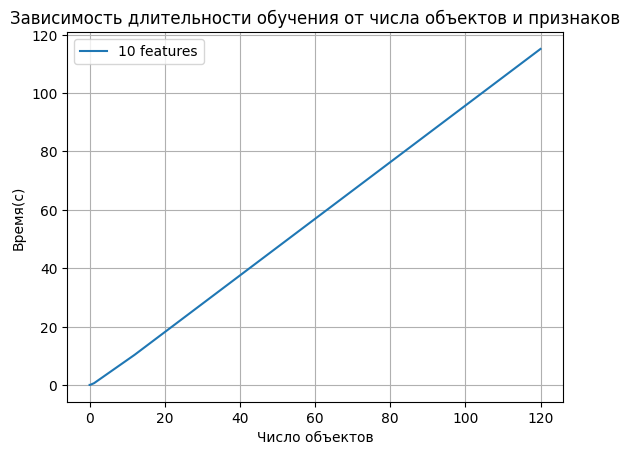

In [ ]:
plt.title('Зависимость длительности обучения от числа объектов и признаков')

# plt.plot(np.array(list(history[100].keys())) / 100000 * 120, np.array(list(history[100].values())),label="10 features")
# plt.plot(np.array(list(history[10].keys())) / 100000 * 0.5, np.array(list(history[10].values())),label="10 features")
# plt.plot(np.array(list(history[10].keys())) / 100000 * 0.5, np.array(list(history[10].values())),label="10 features")
# plt.plot(history[50].keys(), history[50].values(), label="50 features")
# plt.plot(history[100].keys(), history[100].values(), label="100 features")
plt.legend()
# for alpha_i in range(alphas.shape[0]):
#     for beta_i in range(betas.shape[0]):
#         ax[alpha_i][beta_i].plot(range(1, len(history_al_bet_st_batch[0][0][alpha_i][beta_i]['func']) + 1),
#                                  history_al_bet_st_batch[0][0][alpha_i][beta_i]['func'])
#         ax[alpha_i][beta_i].set_title('step_alpha='+str(alphas[alpha_i])+', step_beta='+str(betas[beta_i]))
#         ax[alpha_i][beta_i].set_xlabel('Номер эпохи')
#         ax[alpha_i][beta_i].set_ylabel('Функция потери')
#         ax[alpha_i][beta_i].grid()
plt.ylabel('Время(с)')
plt.xlabel('Число объектов')
plt.grid()
# fig.savefig('history_SGD_1_0.svg')
# fig.show()

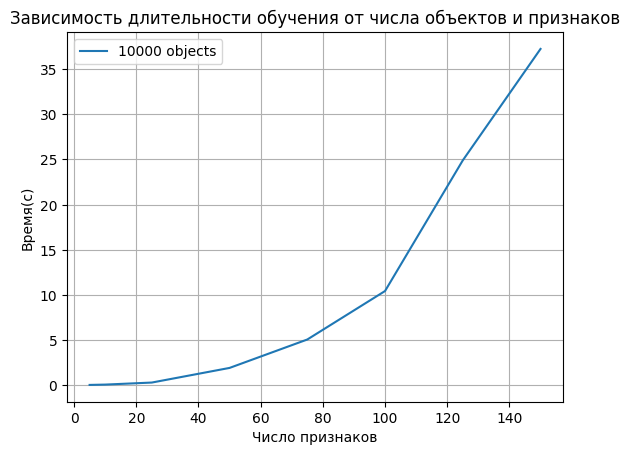

In [ ]:
plt.title('Зависимость длительности обучения от числа объектов и признаков')

plt.plot(np.array(list(new_history[10000].keys())), np.array(list(new_history[10000].values())),label="10000 objects")
# plt.plot(np.array(list(history[10].keys())) / 100000 * 0.5, np.array(list(history[10].values())),label="10 features")
# plt.plot(np.array(list(history[10].keys())) / 100000 * 0.5, np.array(list(history[10].values())),label="10 features")
# plt.plot(history[50].keys(), history[50].values(), label="50 features")
# plt.plot(history[100].keys(), history[100].values(), label="100 features")
plt.legend()
# for alpha_i in range(alphas.shape[0]):
#     for beta_i in range(betas.shape[0]):
#         ax[alpha_i][beta_i].plot(range(1, len(history_al_bet_st_batch[0][0][alpha_i][beta_i]['func']) + 1),
#                                  history_al_bet_st_batch[0][0][alpha_i][beta_i]['func'])
#         ax[alpha_i][beta_i].set_title('step_alpha='+str(alphas[alpha_i])+', step_beta='+str(betas[beta_i]))
#         ax[alpha_i][beta_i].set_xlabel('Номер эпохи')
#         ax[alpha_i][beta_i].set_ylabel('Функция потери')
#         ax[alpha_i][beta_i].grid()
plt.ylabel('Время(с)')
plt.xlabel('Число признаков')
plt.grid()
# fig.savefig('history_SGD_1_0.svg')
# fig.show()

10000 объектов и 200 признаков -> 6 минут

In [ ]:
a = np.array([
    [1, 0.2, 0.3],
    [0.2, 1, 0.8],
    [0.3, 0.8, 1],
])
b = np.array([
    [12, 0.2, 0.33],
    [0.32, 31, 0.84],
    [0.35, 0.38, 21],
    [0.13, 0.18, -1],
])
c = np.concatenate([a[0] < 0.4, np.full((b.shape[1] - a.shape[0],), False)])
b = np.concatenate([b, b.T[0].reshape(-1, 1) + b.T[c].T], axis=1)
b

array([[12.  ,  0.2 ,  0.33, 12.2 , 12.33],
       [ 0.32, 31.  ,  0.84, 31.32,  1.16],
       [ 0.35,  0.38, 21.  ,  0.73, 21.35],
       [ 0.13,  0.18, -1.  ,  0.31, -0.87]])

In [ ]:
np.array([[1,0], [1, 1]]) + 1

array([[2, 1],
       [2, 2]])

In [ ]:
np.log(10)

2.302585092994046

In [ ]:
a[:,:2][a[:,:2] < 0.3] = 100

In [ ]:
a

array([[1. , 0.2, 0. ],
       [0. , 1. , 0. ],
       [1. , 0.8, 0. ]])

In [ ]:
a[[0, 1],[0, 1]]

array([1., 1.])

In [ ]:
a = np.array([
    [2, 0.2, 100],
    [0, 1, 100],
    [4, 0.8, 100],
])

In [ ]:
a[:,0].reshape(-1, 1) != 0

array([[ True],
       [False],
       [ True]])

In [ ]:
a[:,[10]]

IndexError: ignored

In [ ]:
a[:,[1]] + np.zeros(())

array([[0.2],
       [1. ],
       [0.8]])

In [ ]:
a[:,[0, 0]]

array([[2., 2.],
       [0., 0.],
       [4., 4.]])

In [ ]:
np.repeat(a[:,[1]], 0, 1)

array([], shape=(3, 0), dtype=float64)

In [ ]:
np.divide(np.repeat(a[:,1].reshape(-1, 1), a[:,[0, 2]].shape[1], axis=1), a[:,[0, 2]], out=np.repeat(a[:,1].reshape(-1, 1), a[:,[0, 2]].shape[1], axis=1), where=(a[:,[0, 2]] != 0))

array([[0.1  , 0.002],
       [1.   , 0.01 ],
       [0.2  , 0.008]])

In [ ]:
np.log(a, where=(a > 0))

array([[ 0.        ,  4.60517019, -1.2039728 ],
       [ 4.60517019,  0.        , -0.22314355],
       [-1.2039728 , -0.22314355,  0.        ]])

In [ ]:
a[0][0] = 0

In [ ]:
a

NameError: ignored

In [ ]:
np.where(a[:,:2] == 0, -10, (1/(a[:,:2][a[:,:2] != 0] =  1))

ValueError: ignored

In [ ]:
c = np.concatenate([a[0] < 0.4, np.full((b.shape[1] - a.shape[0],), False)])
b = np.concatenate([b, b.T[0].reshape(-1, 1) + b.T[c].T], axis=1)
b

array([[12.  ,  0.2 ,  0.33, 12.2 , 12.33, 12.2 , 12.33, 12.2 , 12.33,
        12.2 , 12.33],
       [ 0.32, 31.  ,  0.84, 31.32,  1.16, 31.32,  1.16, 31.32,  1.16,
        31.32,  1.16],
       [ 0.35,  0.38, 21.  ,  0.73, 21.35,  0.73, 21.35,  0.73, 21.35,
         0.73, 21.35],
       [ 0.13,  0.18, -1.  ,  0.31, -0.87,  0.31, -0.87,  0.31, -0.87,
         0.31, -0.87]])

In [ ]:
corr = np.array([
    [1.0, 0.2, 0],
    [0.2, 1.0, 0.4],
    [0, 0.4, 1.0],
])
x = np.array([
    [0, 0, 10],
    [1, -1, 20],
    [12, 30, 33],
    [100, 36, 443],
])

In [ ]:
FeatureGenerationTransformer(thr=0.01, features_mask=None)

FeatureGenerationTransformer(thr=0.01)

In [ ]:
   feat_gen = FeatureGenerationTransformer(thr=0.01)
   feat_gen.fit(x)

FeatureGenerationTransformer(features_mask=array([0, 1, 2]), thr=0.01)

In [ ]:
np.corrcoef(x.T)

array([[1.        , 0.75374649, 0.99730317],
       [0.75374649, 1.        , 0.70375939],
       [0.99730317, 0.70375939, 1.        ]])

In [ ]:
def sub(arr):
    return arr[-1] - arr[0]

def div(arr):
    if arr[0] == 0:
        return arr[-1] / EPS
    return arr[-1] / arr[0]

In [ ]:
indxs_mat = np.array([[ [i,j] for j in range(3)] for i in range(3)])
indxs_mat = indxs_mat[corr < 0.3]
indxs_mat = indxs_mat[indxs_mat[:, 0] > indxs_mat[:, 1]]
np.sum(x.T[indxs_mat], axis=1).T
print(x.T[indxs_mat] - x.T[indxs_mat][:,::-1])
print("---------------")
print(x.T[indxs_mat] / (x.T[indxs_mat][:,::-1] + EPS))

[[[   0   -2   18  -64]
  [   0    2  -18   64]]

 [[  10   19   21  343]
  [ -10  -19  -21 -343]]]
---------------
[[[ 0.00000000e+00 -1.00000000e+00  2.50000000e+00  3.60000000e-01]
  [ 0.00000000e+00 -1.00000000e+00  4.00000000e-01  2.77777778e+00]]

 [[ 1.00000000e+21  2.00000000e+01  2.75000000e+00  4.43000000e+00]
  [ 0.00000000e+00  5.00000000e-02  3.63636364e-01  2.25733634e-01]]]


In [ ]:
(x.T[indxs_mat] - x.T[indxs_mat][:,::-1]).reshape(indxs_mat.shape[0] * 2, x.shape[0]).T

array([[   0,    0,   10,  -10],
       [  -2,    2,   19,  -19],
       [  18,  -18,   21,  -21],
       [ -64,   64,  343, -343]])

In [ ]:
(x.T[indxs_mat] / (x.T[indxs_mat][:,::-1] + EPS)).reshape(indxs_mat.shape[0] * 2, x.shape[0]).T

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+21,
         0.00000000e+00],
       [-1.00000000e+00, -1.00000000e+00,  2.00000000e+01,
         5.00000000e-02],
       [ 2.50000000e+00,  4.00000000e-01,  2.75000000e+00,
         3.63636364e-01],
       [ 3.60000000e-01,  2.77777778e+00,  4.43000000e+00,
         2.25733634e-01]])

In [ ]:
x.T[indxs_mat]

array([[[  0,  -1,  30,  36],
        [  0,   1,  12, 100]],

       [[ 10,  20,  33, 443],
        [  0,   1,  12, 100]]])

In [ ]:
np.sum(x.T[indxs_mat], axis=1)

array([[  0,   0,  42, 136],
       [ 10,  21,  45, 543]])

In [ ]:
np.apply_along_axis(sub, 1, x.T[indxs_mat]).T

TypeError: ignored